In [365]:
!pip install yfinance

In [366]:
pip install plotly pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


#Business Understanding

The code below will analyse stock market data, more precisely, BlackRock's stock, which is one of the biggest Investment Management companies in the world. Its head office is in the world famous Wall Street, New York City.
Our Analysis will consider past 4 years, from 03/06/2019 to 31/05/2023.

#Data Understanding

Understanting the data by looking into the structure of data (number of columns and name of columns).
Our analysed Data is a quantitative data and will use visualization in data preparation to understand what kind of behaviour the data has.

#Data Preparation

Preparing the data using yfinance to import BlackRock stock.

Data range is from 03/06/2019 to 31/05/2023.



In [367]:
import yfinance as yf
from datetime import datetime

stock_ticker = input("Enter the stock ticker: ")

while not stock_ticker:
    print("Please enter a valid stock ticker.")
    stock_ticker = input("Enter the stock ticker: ")
stk = yf.Ticker(stock_ticker)

# Start and end date
start_date_str = input("Enter the start date (YYYY-MM-DD): ")
end_date_str = input("Enter the end date (YYYY-MM-DD): ")

# Validate and convert input dates to datetime objects
try:
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
except ValueError:
    print("Invalid date format. Please use the format YYYY-MM-DD.")
    exit()
if end_date <= start_date:
    print("End date must be after the start date.")
    exit()

data = stk.history(start=start_date, end=end_date, auto_adjust=True)

In [368]:
##data = stk.history(start="2017-06-01", end="2023-06-01", auto_adjust=True)
##data

Within the preparation for our Modelling, our target variable are going to be selected: the data of interest is Close Price, so DataFrame will consider 'Close' as the main column and drop the others.

First, for visualization, we will look into Stock Close Price Hist and Volatility.

In [369]:
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly import tools
import plotly.offline as offline
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot



In [370]:
data.dropna(inplace=True)

dataClose = pd.DataFrame(data['Close'])
dataClose.tail()

Close
Date                                 
2023-11-24 00:00:00-05:00  725.260437
2023-11-27 00:00:00-05:00  725.836609
2023-11-28 00:00:00-05:00  731.876282
2023-11-29 00:00:00-05:00  742.346436
2023-11-30 00:00:00-05:00  746.250366

In [371]:
dataClose['rets'] = np.log(dataClose / dataClose.shift(1))
dataClose['vola'] = dataClose['rets'].rolling(252).std() * np.sqrt(252)

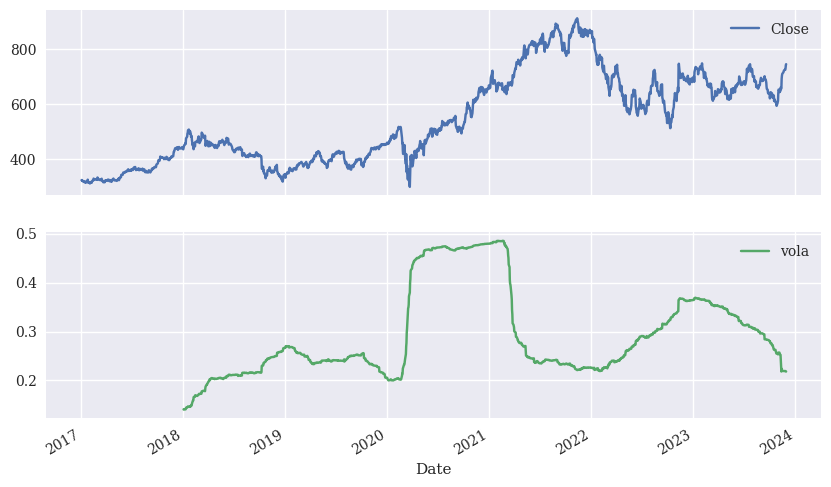

In [372]:
dataClose[['Close', 'vola']].plot(subplots=True, figsize=(10, 6));

In [373]:
bnh = dataClose
bnh['rets']

Date
2017-01-03 00:00:00-05:00         NaN
2017-01-04 00:00:00-05:00    0.000595
2017-01-05 00:00:00-05:00   -0.010712
2017-01-06 00:00:00-05:00    0.004590
2017-01-09 00:00:00-05:00   -0.010148
                               ...   
2023-11-24 00:00:00-05:00    0.004062
2023-11-27 00:00:00-05:00    0.000794
2023-11-28 00:00:00-05:00    0.008287
2023-11-29 00:00:00-05:00    0.014205
2023-11-30 00:00:00-05:00    0.005245
Name: rets, Length: 1740, dtype: float64

Here I am analysing the behaviour of data in the yfinance's stock data.

#Visualization

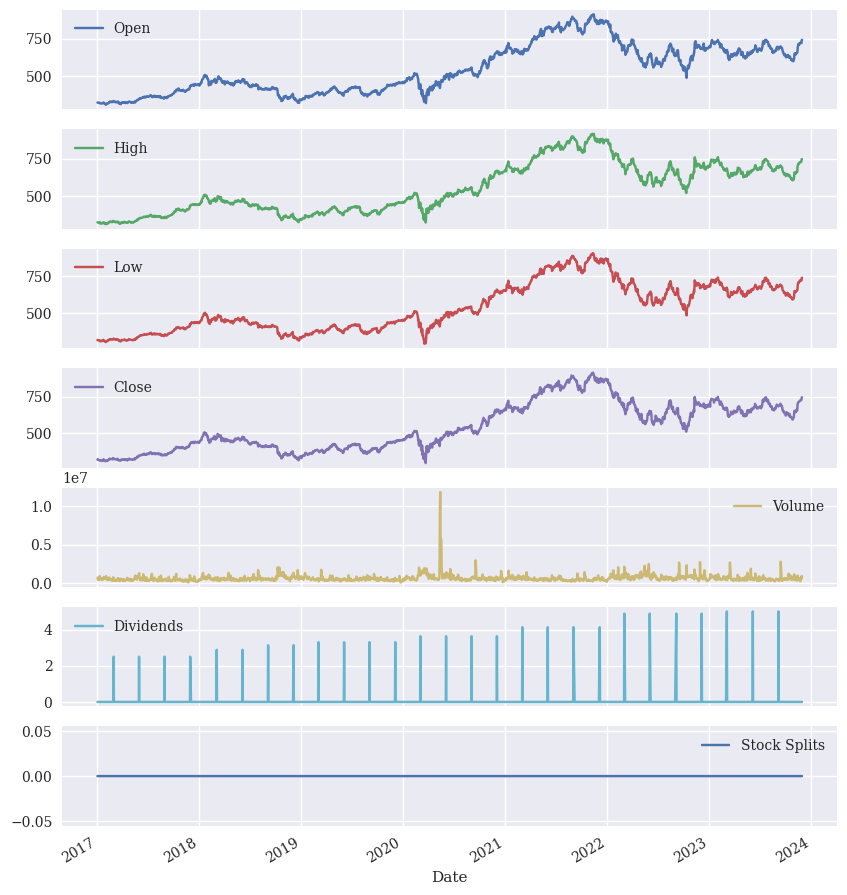

In [374]:
data.plot(figsize=(10, 12), subplots=True);

In [375]:
instruments = ['Stock Open Price','Stock Close Price', 'Stock Volume']

In [376]:
df = pd.DataFrame(data)
dataAn= df.drop(["High", "Low", "Dividends", "Stock Splits"], axis=1)
dataAn


Open       Close  Volume
Date                                                     
2017-01-03 00:00:00-05:00  321.365755  322.878082  743900
2017-01-04 00:00:00-05:00  321.390776  323.070221  680800
2017-01-05 00:00:00-05:00  321.666560  319.627838  468400
2017-01-06 00:00:00-05:00  320.488521  321.098450  453400
2017-01-09 00:00:00-05:00  321.140207  317.856537  505300
...                               ...         ...     ...
2023-11-24 00:00:00-05:00  721.902837  725.260437  279600
2023-11-27 00:00:00-05:00  722.379696  725.836609  868100
2023-11-28 00:00:00-05:00  721.048510  731.876282  610200
2023-11-29 00:00:00-05:00  737.359752  742.346436  750000
2023-11-30 00:00:00-05:00  743.200709  746.250366  961300

[1740 rows x 3 columns]

In [377]:
for ric, name in zip(dataAn.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

Open     | Stock Open Price
Close    | Stock Close Price
Volume   | Stock Volume


In [378]:
## Google Colab
import plotly.offline as plyo
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
##
## SETUP
##
def configure_plotly_browser_state():
   import IPython
   display (IPython.core.display.HTML('''
         <script src="/static/components/requirejs/require.js"></script>
         <script>
           require js.config({
             paths:{
               base:'/static/base',
               plotly:'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
             }
           });
         </script>
         '''))

In [379]:
plyo.init_notebook_mode(connected=True)

In [380]:
index = pd.date_range(start=start_date,
                      end=end_date,
                      freq='B',
                      )

In [381]:
dataAn.info

<bound method DataFrame.info of                                  Open       Close  Volume
Date                                                     
2017-01-03 00:00:00-05:00  321.365755  322.878082  743900
2017-01-04 00:00:00-05:00  321.390776  323.070221  680800
2017-01-05 00:00:00-05:00  321.666560  319.627838  468400
2017-01-06 00:00:00-05:00  320.488521  321.098450  453400
2017-01-09 00:00:00-05:00  321.140207  317.856537  505300
...                               ...         ...     ...
2023-11-24 00:00:00-05:00  721.902837  725.260437  279600
2023-11-27 00:00:00-05:00  722.379696  725.836609  868100
2023-11-28 00:00:00-05:00  721.048510  731.876282  610200
2023-11-29 00:00:00-05:00  737.359752  742.346436  750000
2023-11-30 00:00:00-05:00  743.200709  746.250366  961300

[1740 rows x 3 columns]>

#Visualizing data in an interactive way

Our analysis below will maily consist in Volume and Open/Close prices.

With this analysis, we can se the days the stock had a bigger negotiation volume and if it had an impact on prices.

In [382]:
df_price= dataAn.drop(columns=["Volume"])
df_volume=dataAn.drop(columns=["Open","Close"])


In [383]:
## Google Colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)
##

plyo.iplot(
    df_price.iplot(asFigure=True),
    #image='png',
   ## filename='ply_01'
)
plyo.iplot(
    df_volume.iplot(asFigure=True),
)


Only by visualizing the volume and price, we can see exactly how Covid pandemic hit the Stock, starting from February 2020 to the lowest point in March 23rd.

#Modelling

Our main objective is to code the best model in order to have better results in the stock market strategy:

#Analysing Stocks | Statistical analysis and Moving Averages

In [384]:
import datetime as dt
from pylab import mpl, plt
import io

In [385]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

*df_price* consists on Open and Close prices.

In [386]:
df_price

Open       Close
Date                                             
2017-01-03 00:00:00-05:00  321.365755  322.878082
2017-01-04 00:00:00-05:00  321.390776  323.070221
2017-01-05 00:00:00-05:00  321.666560  319.627838
2017-01-06 00:00:00-05:00  320.488521  321.098450
2017-01-09 00:00:00-05:00  321.140207  317.856537
...                               ...         ...
2023-11-24 00:00:00-05:00  721.902837  725.260437
2023-11-27 00:00:00-05:00  722.379696  725.836609
2023-11-28 00:00:00-05:00  721.048510  731.876282
2023-11-29 00:00:00-05:00  737.359752  742.346436
2023-11-30 00:00:00-05:00  743.200709  746.250366

[1740 rows x 2 columns]

In [387]:
#Cleaning data | Dropping 'Open Price' column

blk=df_price.drop(columns=['Open'])

After cleaning and Analysing the data, it's time to start modelling.

# Daily Return

In [388]:
blk['daily_returns']=(blk['Close'].pct_change())*100

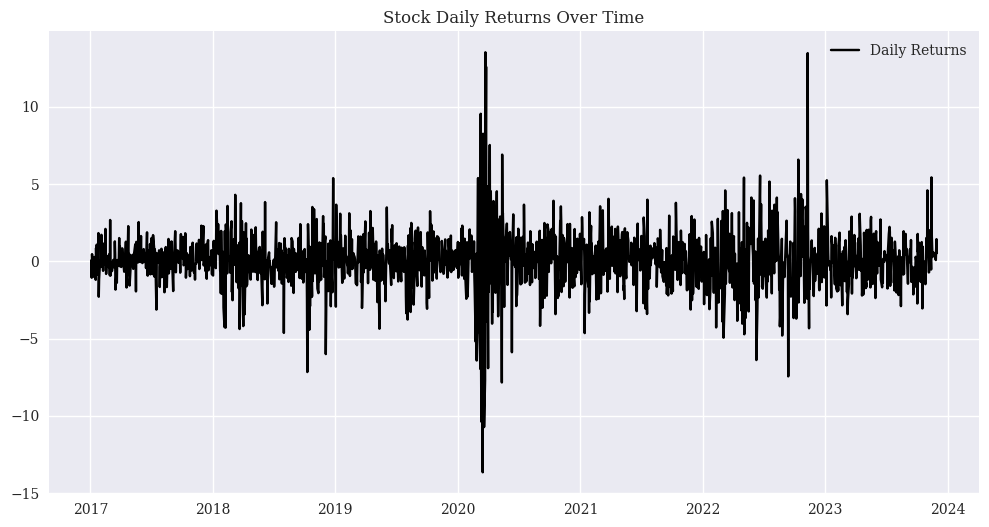

In [389]:
blk.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
ax.spines[['top','right','left','bottom']].set_visible(False)
plt.plot(blk['daily_returns'],color='black', label = 'Daily Returns')
plt.legend(loc='best')
plt.title('Stock Daily Returns Over Time')
plt.show()

In [390]:
print('the return from Blackrock in the analysed time period was', blk['daily_returns'].sum(),"%")

the return from Blackrock in the analysed time period was 113.31317200373097 %


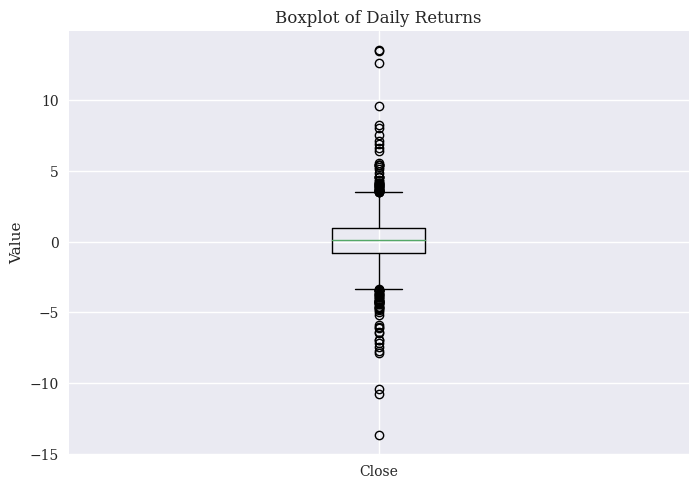

In [391]:
#Boxplot of Returns

dailyr = [blk['daily_returns']]
plt.boxplot(dailyr)
plt.xticks([1], ['Close'])
plt.title('Boxplot of Daily Returns')
plt.ylabel('Value')
plt.show()

#Daily Return of the Stock

Variations of BLK stock are normally between -1,5% and 2%, with fewer outliers of more than 10% variation in a day

#Trading Strategies | Crossing Moving Averages

In [392]:
SMAFast= 50
SMASlow= 200

blk=blk.drop(columns=['daily_returns'])

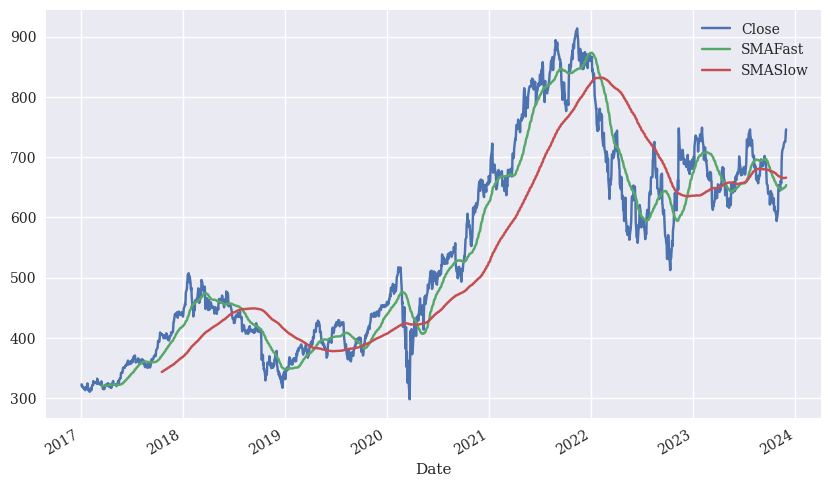

In [393]:
blk['SMAFast'] = blk['Close'].rolling(SMAFast).mean()
blk['SMASlow'] = blk['Close'].rolling(SMASlow).mean()
blk.plot(figsize=(10, 6));

In [394]:
#Cleaning Data
blk.dropna(inplace=True)


In [395]:
blk['Position'] = np.where(blk['SMAFast'] > blk['SMASlow'], 1, -1)

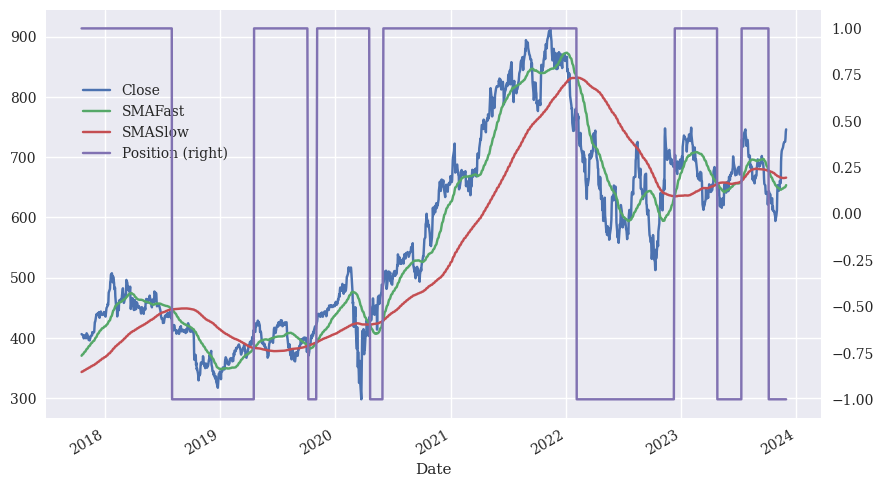

In [396]:
axN = blk.plot(secondary_y='Position', figsize=(10, 6))
axN.get_legend().set_bbox_to_anchor((0.25, 0.85));

#Vectorized Backtesting | 2 Moving Averages

In [397]:
blk['Returns'] = np.log(blk['Close'] / blk['Close'].shift(1))

In [398]:
blk['Strategy1'] = blk['Position'].shift(1) * blk['Returns']

In [399]:
blk.round(4).tail()

Close   SMAFast   SMASlow  Position  Returns  \
Date                                                                         
2023-11-24 00:00:00-05:00  725.2604  649.6472  665.5372        -1   0.0041   
2023-11-27 00:00:00-05:00  725.8366  650.3082  665.6868        -1   0.0008   
2023-11-28 00:00:00-05:00  731.8763  651.1400  665.8300        -1   0.0083   
2023-11-29 00:00:00-05:00  742.3464  652.2991  665.9605        -1   0.0142   
2023-11-30 00:00:00-05:00  746.2504  653.6451  666.1481        -1   0.0052   

                           Strategy1  
Date                                  
2023-11-24 00:00:00-05:00    -0.0041  
2023-11-27 00:00:00-05:00    -0.0008  
2023-11-28 00:00:00-05:00    -0.0083  
2023-11-29 00:00:00-05:00    -0.0142  
2023-11-30 00:00:00-05:00    -0.0052

In [400]:
blk.dropna(inplace=True)

In [401]:
np.exp(blk[['Returns', 'Strategy1']].sum())

Returns      1.836233
Strategy1    0.816759
dtype: float64

In [402]:
blk[['Returns', 'Strategy1']].std() * 252 ** 0.5

Returns      0.306678
Strategy1    0.306735
dtype: float64

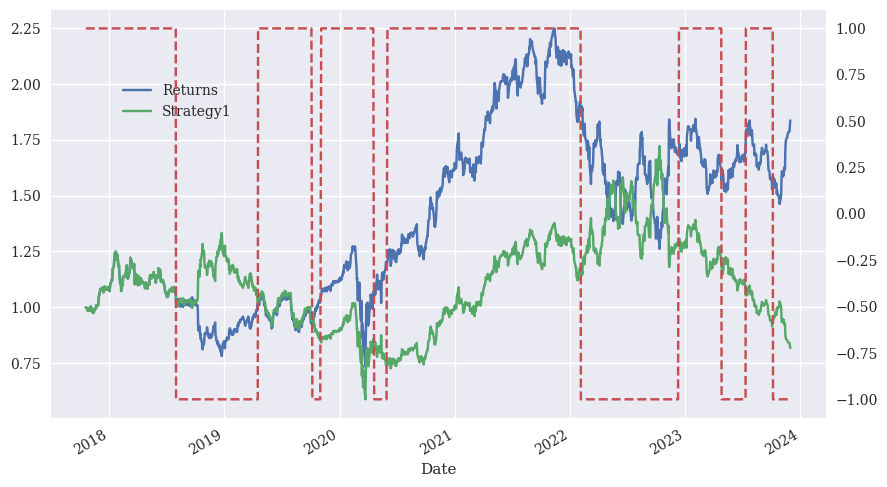

In [403]:
ax = blk[['Returns', 'Strategy1']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
blk['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [404]:
blk.drop(columns=["Returns", "Strategy1"])

Close     SMAFast     SMASlow  Position
Date                                                                   
2017-10-19 00:00:00-04:00  405.798645  371.264925  343.805286         1
2017-10-20 00:00:00-04:00  405.653870  372.226146  344.235416         1
2017-10-23 00:00:00-04:00  403.755859  373.124534  344.648703         1
2017-10-24 00:00:00-04:00  403.185730  373.945533  345.075349         1
2017-10-25 00:00:00-04:00  399.296112  374.685524  345.483006         1
...                               ...         ...         ...       ...
2023-11-24 00:00:00-05:00  725.260437  649.647194  665.537171        -1
2023-11-27 00:00:00-05:00  725.836609  650.308184  665.686826        -1
2023-11-28 00:00:00-05:00  731.876282  651.140032  665.830035        -1
2023-11-29 00:00:00-05:00  742.346436  652.299097  665.960474        -1
2023-11-30 00:00:00-05:00  746.250366  653.645115  666.148144        -1

[1539 rows x 4 columns]

#Testing with 3 Moving Averages

In [405]:
blk.drop(columns=["SMAFast", "SMASlow", "Position"])

Close   Returns  Strategy1
Date                                                      
2017-10-19 00:00:00-04:00  405.798645 -0.001488  -0.001488
2017-10-20 00:00:00-04:00  405.653870 -0.000357  -0.000357
2017-10-23 00:00:00-04:00  403.755859 -0.004690  -0.004690
2017-10-24 00:00:00-04:00  403.185730 -0.001413  -0.001413
2017-10-25 00:00:00-04:00  399.296112 -0.009694  -0.009694
...                               ...       ...        ...
2023-11-24 00:00:00-05:00  725.260437  0.004062  -0.004062
2023-11-27 00:00:00-05:00  725.836609  0.000794  -0.000794
2023-11-28 00:00:00-05:00  731.876282  0.008287  -0.008287
2023-11-29 00:00:00-05:00  742.346436  0.014205  -0.014205
2023-11-30 00:00:00-05:00  746.250366  0.005245  -0.005245

[1539 rows x 3 columns]

In [406]:
SMAFast= 3
SMAMedian= 8
SMASlow= 20
blk

Close     SMAFast     SMASlow  Position  \
Date                                                                      
2017-10-19 00:00:00-04:00  405.798645  371.264925  343.805286         1   
2017-10-20 00:00:00-04:00  405.653870  372.226146  344.235416         1   
2017-10-23 00:00:00-04:00  403.755859  373.124534  344.648703         1   
2017-10-24 00:00:00-04:00  403.185730  373.945533  345.075349         1   
2017-10-25 00:00:00-04:00  399.296112  374.685524  345.483006         1   
...                               ...         ...         ...       ...   
2023-11-24 00:00:00-05:00  725.260437  649.647194  665.537171        -1   
2023-11-27 00:00:00-05:00  725.836609  650.308184  665.686826        -1   
2023-11-28 00:00:00-05:00  731.876282  651.140032  665.830035        -1   
2023-11-29 00:00:00-05:00  742.346436  652.299097  665.960474        -1   
2023-11-30 00:00:00-05:00  746.250366  653.645115  666.148144        -1   

                            Returns  Strategy1  
Date                                            
2017-10-19 00:00:00-04:00 -0.001488  -0.001488  
2017-10-20 00:00:00-04:00 -0.000357  -0.000357  
2017-10-23 00:00:00-04:00 -0.004690  -0.004690  
2017-10-24 00:00:00-04:00 -0.001413  -0.001413  
2017-10-25 00:00:00-04:00 -0.009694  -0.009694  
...                             ...        ...  
2023-11-24 00:00:00-05:00  0.004062  -0.004062  
2023-11-27 00:00:00-05:00  0.000794  -0.000794  
2023-11-28 00:00:00-05:00  0.008287  -0.008287  
2023-11-29 00:00:00-05:00  0.014205  -0.014205  
2023-11-30 00:00:00-05:00  0.005245  -0.005245  

[1539 rows x 6 columns]

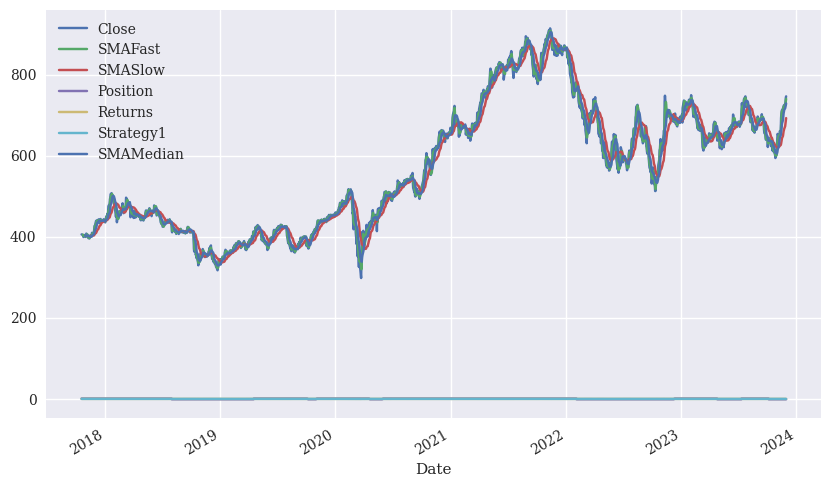

In [407]:
blk['SMAFast'] = blk['Close'].rolling(SMAFast).mean()
blk['SMAMedian'] = blk['Close'].rolling(SMAMedian).mean()
blk['SMASlow'] = blk['Close'].rolling(SMASlow).mean()
blk.plot(figsize=(10, 6));

In [408]:
#Cleaning Data
blk.dropna(inplace=True)
blk.drop(columns=["Position"])

Close     SMAFast     SMASlow   Returns  \
Date                                                                      
2017-11-15 00:00:00-05:00  400.445129  398.901815  401.951173  0.000106   
2017-11-16 00:00:00-05:00  403.440948  401.429576  401.833289  0.007453   
2017-11-17 00:00:00-05:00  403.415405  402.433828  401.721365 -0.000063   
2017-11-20 00:00:00-05:00  404.079346  403.645233  401.737540  0.001644   
2017-11-21 00:00:00-05:00  409.688141  405.727631  402.062660  0.013785   
...                               ...         ...         ...       ...   
2023-11-24 00:00:00-05:00  725.260437  722.472392  666.151361  0.004062   
2023-11-27 00:00:00-05:00  725.836609  724.472371  672.737415  0.000794   
2023-11-28 00:00:00-05:00  731.876282  727.657776  679.176447  0.008287   
2023-11-29 00:00:00-05:00  742.346436  733.353109  685.882697  0.014205   
2023-11-30 00:00:00-05:00  746.250366  740.157694  692.588947  0.005245   

                           Strategy1   SMAMedian  
Date                                              
2017-11-15 00:00:00-05:00   0.000106  399.984489  
2017-11-16 00:00:00-05:00   0.007453  399.815323  
2017-11-17 00:00:00-05:00  -0.000063  399.881268  
2017-11-20 00:00:00-05:00   0.001644  400.154686  
2017-11-21 00:00:00-05:00   0.013785  401.724972  
...                              ...         ...  
2023-11-24 00:00:00-05:00  -0.004062  712.837082  
2023-11-27 00:00:00-05:00  -0.000794  716.975723  
2023-11-28 00:00:00-05:00  -0.008287  720.442589  
2023-11-29 00:00:00-05:00  -0.014205  724.465744  
2023-11-30 00:00:00-05:00  -0.005245  728.733521  

[1520 rows x 6 columns]

In [409]:
blk['Position3SMA'] = np.where((blk['SMAFast'] > blk['SMASlow']) & (blk['SMASlow'] < blk['SMAMedian']), 1, -1)
blk

Close     SMAFast     SMASlow  Position  \
Date                                                                      
2017-11-15 00:00:00-05:00  400.445129  398.901815  401.951173         1   
2017-11-16 00:00:00-05:00  403.440948  401.429576  401.833289         1   
2017-11-17 00:00:00-05:00  403.415405  402.433828  401.721365         1   
2017-11-20 00:00:00-05:00  404.079346  403.645233  401.737540         1   
2017-11-21 00:00:00-05:00  409.688141  405.727631  402.062660         1   
...                               ...         ...         ...       ...   
2023-11-24 00:00:00-05:00  725.260437  722.472392  666.151361        -1   
2023-11-27 00:00:00-05:00  725.836609  724.472371  672.737415        -1   
2023-11-28 00:00:00-05:00  731.876282  727.657776  679.176447        -1   
2023-11-29 00:00:00-05:00  742.346436  733.353109  685.882697        -1   
2023-11-30 00:00:00-05:00  746.250366  740.157694  692.588947        -1   

                            Returns  Strategy1   SMAMedian  Position3SMA  
Date                                                                      
2017-11-15 00:00:00-05:00  0.000106   0.000106  399.984489            -1  
2017-11-16 00:00:00-05:00  0.007453   0.007453  399.815323            -1  
2017-11-17 00:00:00-05:00 -0.000063  -0.000063  399.881268            -1  
2017-11-20 00:00:00-05:00  0.001644   0.001644  400.154686            -1  
2017-11-21 00:00:00-05:00  0.013785   0.013785  401.724972            -1  
...                             ...        ...         ...           ...  
2023-11-24 00:00:00-05:00  0.004062  -0.004062  712.837082             1  
2023-11-27 00:00:00-05:00  0.000794  -0.000794  716.975723             1  
2023-11-28 00:00:00-05:00  0.008287  -0.008287  720.442589             1  
2023-11-29 00:00:00-05:00  0.014205  -0.014205  724.465744             1  
2023-11-30 00:00:00-05:00  0.005245  -0.005245  728.733521             1  

[1520 rows x 8 columns]

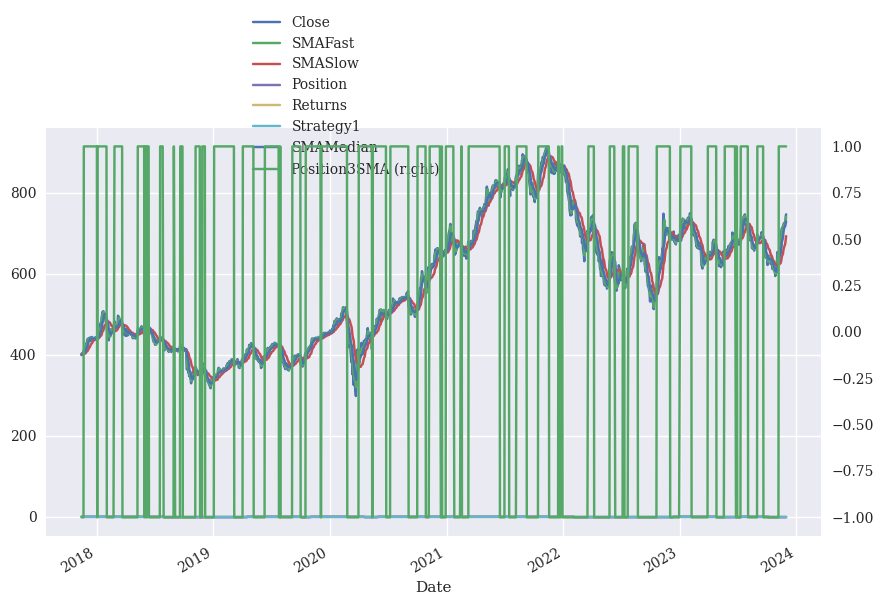

In [410]:
ax3 = blk.plot(secondary_y='Position3SMA', figsize=(10, 6))
ax3.get_legend().set_bbox_to_anchor((0.25, 0.85));

Analysis on 3 SMA considering SMA Median as the normalizer

In [411]:
blk['Returns'] = np.log(blk['Close'] / blk['Close'].shift(1))

In [412]:
blk['Strategy2'] = blk['Position3SMA'].shift(1) * blk['Returns']

In [413]:
blk.round(4).head()

Close   SMAFast   SMASlow  Position  Returns  \
Date                                                                         
2017-11-15 00:00:00-05:00  400.4451  398.9018  401.9512         1      NaN   
2017-11-16 00:00:00-05:00  403.4409  401.4296  401.8333         1   0.0075   
2017-11-17 00:00:00-05:00  403.4154  402.4338  401.7214         1  -0.0001   
2017-11-20 00:00:00-05:00  404.0793  403.6452  401.7375         1   0.0016   
2017-11-21 00:00:00-05:00  409.6881  405.7276  402.0627         1   0.0138   

                           Strategy1  SMAMedian  Position3SMA  Strategy2  
Date                                                                      
2017-11-15 00:00:00-05:00     0.0001   399.9845            -1        NaN  
2017-11-16 00:00:00-05:00     0.0075   399.8153            -1    -0.0075  
2017-11-17 00:00:00-05:00    -0.0001   399.8813            -1     0.0001  
2017-11-20 00:00:00-05:00     0.0016   400.1547            -1    -0.0016  
2017-11-21 00:00:00-05:00     0.0138   401.7250            -1    -0.0138

In [414]:
blk.dropna(inplace=True)

In [415]:
np.exp(blk[['Returns', 'Strategy1', 'Strategy2']].sum())*100

Returns      186.355211
Strategy1     82.891031
Strategy2    331.258872
dtype: float64

In [416]:
blk[['Returns', 'Strategy2']].std() * 252 ** 0.5

Returns      0.308459
Strategy2    0.308273
dtype: float64

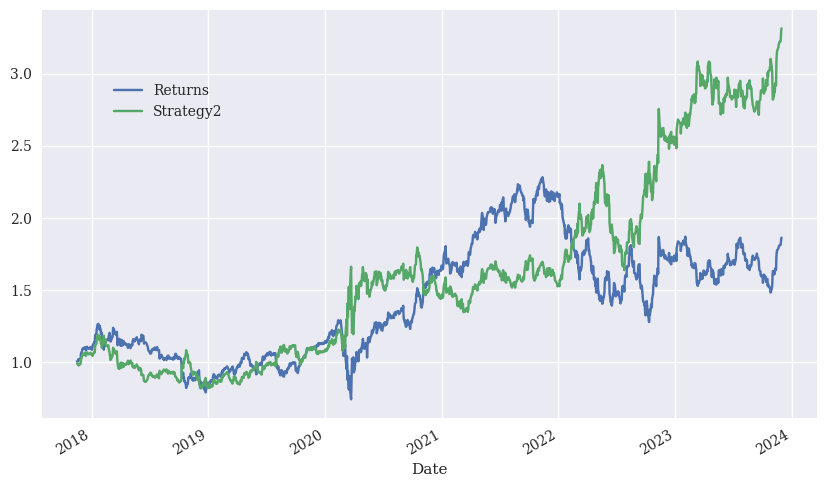

In [417]:
ax2 = blk[['Returns', 'Strategy2']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
blk['Position3SMA'].plot(ax=ax, secondary_y='Position3SMA', style='--')
ax2.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [418]:
blkStratAssemble = blk

In [419]:
stkAssemble = blkStratAssemble

In [420]:
stkAssemble = stkAssemble.drop(columns=['SMAFast', 'SMASlow', 'Position', 'Returns', 'SMAMedian', 'Position3SMA'])

In [421]:
stkAssemble.rename(columns={'Strategy1':'Strategy2SMA', 'Strategy2':'Strategy3SMA'}, inplace=True)

In [422]:
stkAssembleSMA= stkAssemble

In [423]:
from itertools import product

In [424]:
np.exp(blk['Returns'].dropna().sum())

1.8635521109702593

In [425]:
#RMSE, MSE and MBE PREPARATION FOR ACCURACY

import math
from pandas import DataFrame

rtrn = np.exp(blk['Returns'].dropna().cumsum())

mas2 = np.exp(blk['Strategy2'].cumsum())

y_actual = rtrn
y_predicted = mas2

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()

Actual  Prediction
Date                                           
2017-11-16 00:00:00-05:00  1.007481    0.992574
2017-11-17 00:00:00-05:00  1.007417    0.992637
2017-11-20 00:00:00-05:00  1.009075    0.991006
2017-11-21 00:00:00-05:00  1.023082    0.977439
2017-11-22 00:00:00-05:00  1.017938    0.982378
...                             ...         ...
2023-11-24 00:00:00-05:00  1.811136    3.219415
2023-11-27 00:00:00-05:00  1.812574    3.221973
2023-11-28 00:00:00-05:00  1.827657    3.248782
2023-11-29 00:00:00-05:00  1.853803    3.295259
2023-11-30 00:00:00-05:00  1.863552    3.312589

[1519 rows x 2 columns]

In [426]:
#RMSE, MSE and MBE

from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(rtrn, mas2))
print('RMSE value is:', rmse)

mse = np.square(np.subtract(rtrn, mas2)).mean()
print('MSE value is:', mse)

mbe = np.mean(rtrn - mas2)
print('MBE value is:', mbe)

RMSE value is: 0.5662421155140891
MSE value is: 0.3206301333818711
MBE value is: -0.19506261459100438


In [427]:
sma1 = range(20, 61, 4)
sma2 = range(180, 281, 10)

In [428]:
import warnings
warnings.filterwarnings('ignore')

In [429]:
results = pd.DataFrame()

for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(df_price['Close'])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data['SMA1'] = data['Close'].rolling(SMA1).mean()
    data['SMA2'] = data['Close'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    
    new_df = pd.DataFrame({
        'SMA1': SMA1, 
        'SMA2': SMA2,
        'MARKET': perf['Returns'],
        'STRATEGY': perf['Strategy'],
        'OUT': perf['Strategy'] - perf['Returns']
    }, index=[0])
    
    results = pd.concat([results, new_df], ignore_index=True)


In [430]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [431]:
results.sort_values('OUT', ascending=False).head(7)

SMA1  SMA2    MARKET  STRATEGY       OUT
36    32   210  1.862246  1.511794 -0.350452
65    40   280  1.660565  1.292829 -0.367736
64    40   270  1.518797  1.150756 -0.368041
54    36   280  1.660565  1.291544 -0.369021
34    32   190  1.945033  1.566052 -0.378980
97    52   270  1.518797  1.128859 -0.389938
37    32   220  1.863750  1.461516 -0.402234

#Considerations on SMA Trading Strategies:

2 SMA with longer windows showed some efficiency considering the natural stock return, however, testing with 3 SMA (3, 8 and 20 days mean) showed a better result. The rational is setting SMA 8 days as a normalizer between SMA 3 (Fast) and SMA 20 (Slow). In that sense, every time SMA Fast is bigger than SMA Median AND SMA Slow is smaller than SMA Median, it is recommended to buy Stock (output=1), as the code suggests:
blk['Position3SMA'] = np.where((blk['SMAFast'] > blk['SMASlow']) & (blk['SMASlow'] < blk['SMAMedian']), 1, -1)

# Random Walk Hypothesis


In [432]:
df_price

Open       Close
Date                                             
2017-01-03 00:00:00-05:00  321.365755  322.878082
2017-01-04 00:00:00-05:00  321.390776  323.070221
2017-01-05 00:00:00-05:00  321.666560  319.627838
2017-01-06 00:00:00-05:00  320.488521  321.098450
2017-01-09 00:00:00-05:00  321.140207  317.856537
...                               ...         ...
2023-11-24 00:00:00-05:00  721.902837  725.260437
2023-11-27 00:00:00-05:00  722.379696  725.836609
2023-11-28 00:00:00-05:00  721.048510  731.876282
2023-11-29 00:00:00-05:00  737.359752  742.346436
2023-11-30 00:00:00-05:00  743.200709  746.250366

[1740 rows x 2 columns]

In [433]:
data = pd.DataFrame(df_price['Close'])

In [434]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['Close'].shift(lag)
    cols.append(col)

In [435]:
data.head(7)

Close       lag_1       lag_2       lag_3  \
Date                                                                        
2017-01-03 00:00:00-05:00  322.878082         NaN         NaN         NaN   
2017-01-04 00:00:00-05:00  323.070221  322.878082         NaN         NaN   
2017-01-05 00:00:00-05:00  319.627838  323.070221  322.878082         NaN   
2017-01-06 00:00:00-05:00  321.098450  319.627838  323.070221  322.878082   
2017-01-09 00:00:00-05:00  317.856537  321.098450  319.627838  323.070221   
2017-01-10 00:00:00-05:00  317.764648  317.856537  321.098450  319.627838   
2017-01-11 00:00:00-05:00  318.299408  317.764648  317.856537  321.098450   

                                lag_4       lag_5  
Date                                               
2017-01-03 00:00:00-05:00         NaN         NaN  
2017-01-04 00:00:00-05:00         NaN         NaN  
2017-01-05 00:00:00-05:00         NaN         NaN  
2017-01-06 00:00:00-05:00         NaN         NaN  
2017-01-09 00:00:00-05:00  322.878082         NaN  
2017-01-10 00:00:00-05:00  323.070221  322.878082  
2017-01-11 00:00:00-05:00  319.627838  323.070221

In [436]:
data.dropna(inplace=True)

In [437]:
reg = np.linalg.lstsq(data[cols], data['Close'], rcond=-1)[0]

In [438]:
reg.round(3)

array([ 0.981,  0.022,  0.023, -0.028,  0.003])

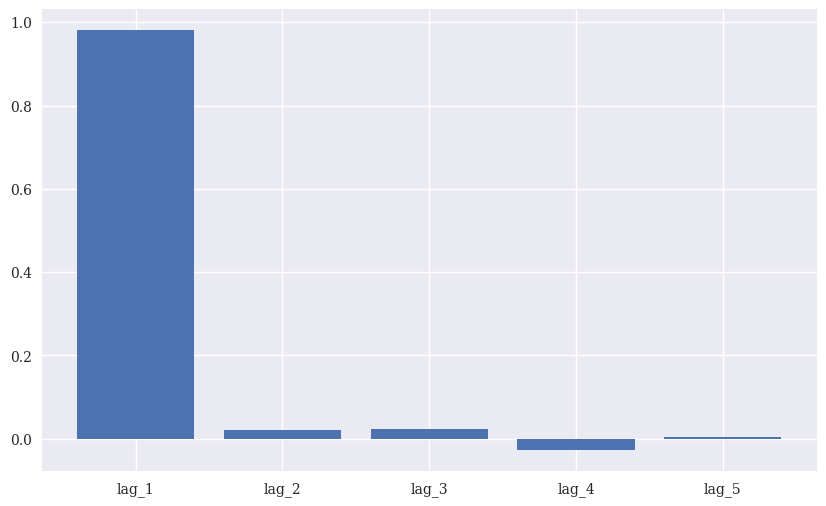

In [439]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg);

In [440]:
data['Prediction'] = np.dot(data[cols], reg)

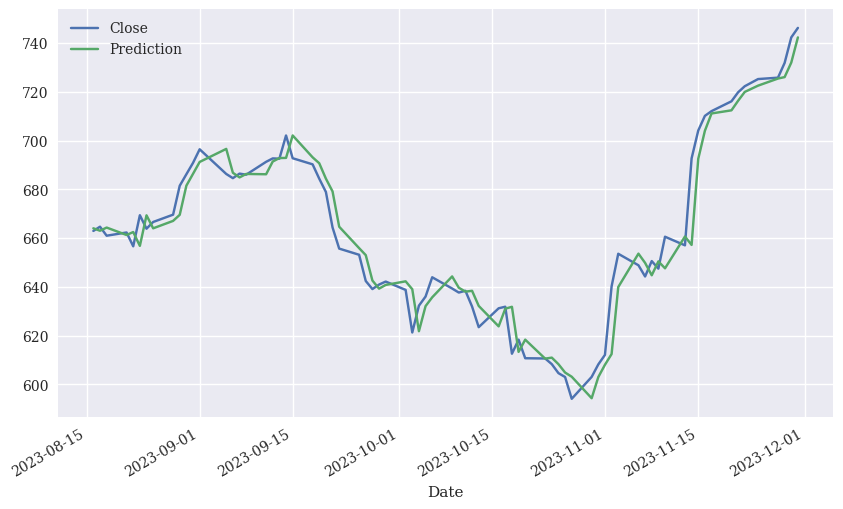

In [441]:
data[['Close', 'Prediction']].iloc[-75:].plot(figsize=(10, 6));

In [442]:
dataRW= data.rename(columns={'Prediction':'PredictionRW'})

In [443]:
dataRandW = dataRW['PredictionRW']

In [444]:
stkAssemble = stkAssemble.join(dataRandW)

stkAssemble

Close  Strategy2SMA  Strategy3SMA  \
Date                                                                
2017-11-16 00:00:00-05:00  403.440948      0.007453     -0.007453   
2017-11-17 00:00:00-05:00  403.415405     -0.000063      0.000063   
2017-11-20 00:00:00-05:00  404.079346      0.001644     -0.001644   
2017-11-21 00:00:00-05:00  409.688141      0.013785     -0.013785   
2017-11-22 00:00:00-05:00  407.628448     -0.005040      0.005040   
...                               ...           ...           ...   
2023-11-24 00:00:00-05:00  725.260437     -0.004062      0.004062   
2023-11-27 00:00:00-05:00  725.836609     -0.000794      0.000794   
2023-11-28 00:00:00-05:00  731.876282     -0.008287      0.008287   
2023-11-29 00:00:00-05:00  742.346436     -0.014205      0.014205   
2023-11-30 00:00:00-05:00  746.250366     -0.005245      0.005245   

                           PredictionRW  
Date                                     
2017-11-16 00:00:00-05:00    400.543084  
2017-11-17 00:00:00-05:00    403.601152  
2017-11-20 00:00:00-05:00    403.512262  
2017-11-21 00:00:00-05:00    404.244432  
2017-11-22 00:00:00-05:00    409.674265  
...                                 ...  
2023-11-24 00:00:00-05:00    722.558814  
2023-11-27 00:00:00-05:00    725.473380  
2023-11-28 00:00:00-05:00    726.067735  
2023-11-29 00:00:00-05:00    732.011991  
2023-11-30 00:00:00-05:00    742.349037  

[1519 rows x 4 columns]

Randow Walk model seems not to be as efficient even considering 5 lags

**Linear OLS Regression**

In [445]:
data = pd.DataFrame(df_price["Close"])

In [446]:
data

Close
Date                                 
2017-01-03 00:00:00-05:00  322.878082
2017-01-04 00:00:00-05:00  323.070221
2017-01-05 00:00:00-05:00  319.627838
2017-01-06 00:00:00-05:00  321.098450
2017-01-09 00:00:00-05:00  317.856537
...                               ...
2023-11-24 00:00:00-05:00  725.260437
2023-11-27 00:00:00-05:00  725.836609
2023-11-28 00:00:00-05:00  731.876282
2023-11-29 00:00:00-05:00  742.346436
2023-11-30 00:00:00-05:00  746.250366

[1740 rows x 1 columns]

In [447]:
data['returns'] = np.log(data/data.shift(1))

In [448]:
data.info

<bound method DataFrame.info of                                 Close   returns
Date                                           
2017-01-03 00:00:00-05:00  322.878082       NaN
2017-01-04 00:00:00-05:00  323.070221  0.000595
2017-01-05 00:00:00-05:00  319.627838 -0.010712
2017-01-06 00:00:00-05:00  321.098450  0.004590
2017-01-09 00:00:00-05:00  317.856537 -0.010148
...                               ...       ...
2023-11-24 00:00:00-05:00  725.260437  0.004062
2023-11-27 00:00:00-05:00  725.836609  0.000794
2023-11-28 00:00:00-05:00  731.876282  0.008287
2023-11-29 00:00:00-05:00  742.346436  0.014205
2023-11-30 00:00:00-05:00  746.250366  0.005245

[1740 rows x 2 columns]>

In [449]:
data.dropna(inplace=True)

In [450]:
data['direction'] = np.sign(data['returns']).astype(int)

In [451]:
data.head()

Close   returns  direction
Date                                                      
2017-01-04 00:00:00-05:00  323.070221  0.000595          1
2017-01-05 00:00:00-05:00  319.627838 -0.010712         -1
2017-01-06 00:00:00-05:00  321.098450  0.004590          1
2017-01-09 00:00:00-05:00  317.856537 -0.010148         -1
2017-01-10 00:00:00-05:00  317.764648 -0.000289         -1

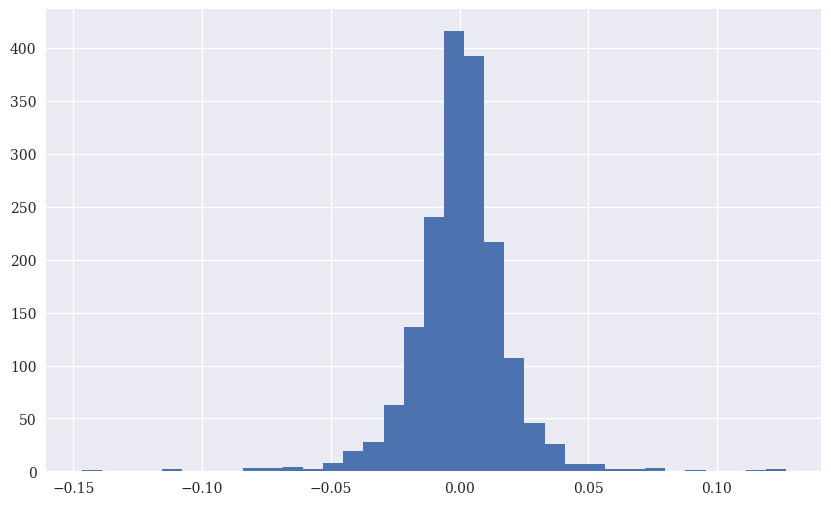

In [452]:
data['returns'].hist(bins=35, figsize=(10, 6));

In [453]:
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [454]:
create_lags(data)

In [455]:
data.head()

Close   returns  direction     lag_1     lag_2
Date                                                                          
2017-01-04 00:00:00-05:00  323.070221  0.000595          1       NaN       NaN
2017-01-05 00:00:00-05:00  319.627838 -0.010712         -1  0.000595       NaN
2017-01-06 00:00:00-05:00  321.098450  0.004590          1 -0.010712  0.000595
2017-01-09 00:00:00-05:00  317.856537 -0.010148         -1  0.004590 -0.010712
2017-01-10 00:00:00-05:00  317.764648 -0.000289         -1 -0.010148  0.004590

In [456]:
data.dropna(inplace=True)

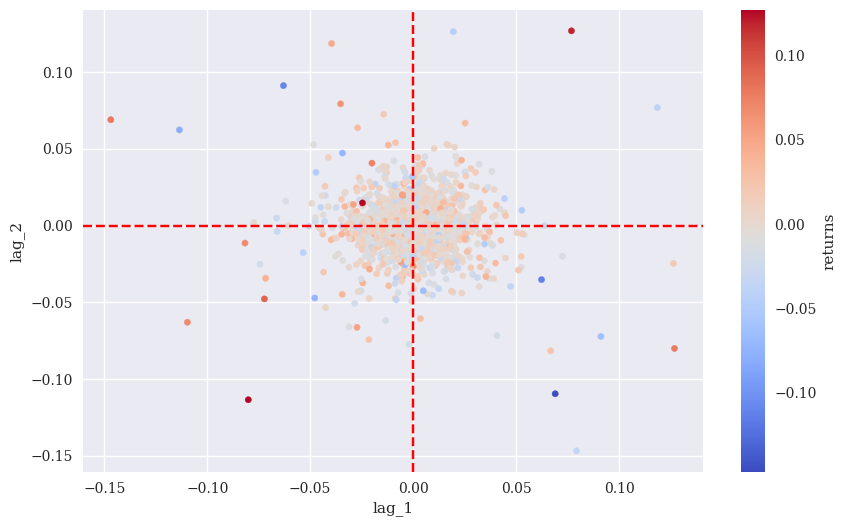

In [457]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns',
                  cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

# Applying Regression

Linear Ordinary Least Squares Regression

In [458]:
from sklearn.linear_model import LinearRegression

*Setting predictions*

Pos_ols_1 => will set a prediction of returns of the stock
Pos_ols_2 => will set a prediction of direction (movement) of the stock

In [459]:
model = LinearRegression()

data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])

In [460]:
data[['pos_ols_1', 'pos_ols_2']].tail()

pos_ols_1  pos_ols_2
Date                                           
2023-11-24 00:00:00-05:00   0.000400   0.074601
2023-11-27 00:00:00-05:00   0.000328   0.072858
2023-11-28 00:00:00-05:00   0.000541   0.071887
2023-11-29 00:00:00-05:00   0.000017   0.071864
2023-11-30 00:00:00-05:00  -0.000195   0.084085

Transforming predictions into directional values (-1 or +1)

In [461]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(
            data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

In [462]:
data['pos_ols_1'].value_counts()

pos_ols_1
 1    1259
-1     478
Name: count, dtype: int64

In [463]:
data['pos_ols_2'].value_counts()

pos_ols_2
 1    1719
-1      18
Name: count, dtype: int64

In [464]:
(data['pos_ols_1'].diff() != 0).sum()

788

In [465]:
(data['pos_ols_2'].diff() != 0).sum()

31

In [466]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']

data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)*100

returns        233.474772
strat_ols_1    209.692036
strat_ols_2    177.085798
dtype: float64

In [467]:
(data['direction'] == data['pos_ols_1']).value_counts()

True     894
False    843
Name: count, dtype: int64

In [468]:
(data['direction'] == data['pos_ols_2']).value_counts()

True     924
False    813
Name: count, dtype: int64

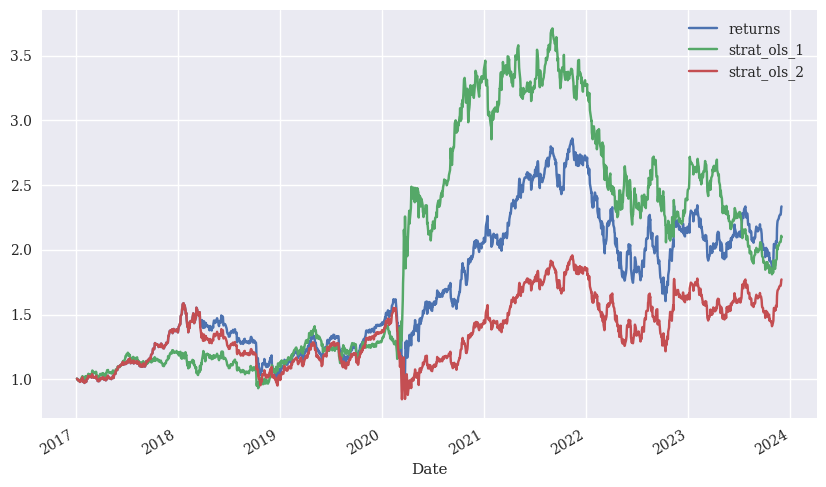

In [469]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

In [470]:
stkAssemble = stkAssemble.join(data['strat_ols_1'])

stkAssemble = stkAssemble.join(data['strat_ols_2'])

In [471]:
#RMSE, MSE and MBE PREPARATION FOR Linear OLS Regression
import math
from pandas import DataFrame
from math import sqrt
from sklearn.metrics import mean_squared_error

rtrn = np.exp(data['returns'].dropna().cumsum())

ols1 = np.exp(data['strat_ols_1'].cumsum())

y_actual = rtrn
y_predicted = ols1

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, ols1))
print('RMSE OLS1 value is:', rmse)

mse = np.square(np.subtract(rtrn, ols1)).mean()
print('MSE OLS1 value is:', mse)

mbe = np.mean(rtrn - ols1)
print('MBE OLS1 value is:', mbe)

rtrn = np.exp(data['returns'].dropna().cumsum())

ols2 = np.exp(data['strat_ols_2'].cumsum())

y_actual = rtrn
y_predicted = ols2

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(rtrn, ols2))
print('RMSE OLS2 value is:', rmse)

mse = np.square(np.subtract(rtrn, ols2)).mean()
print('MSE OLS2 value is:', mse)

mbe = np.mean(rtrn - ols2)
print('MBE OLS2 value is:', mbe)

RMSE OLS1 value is: 0.5434524427492231
MSE OLS1 value is: 0.2953405575300976
MBE OLS1 value is: -0.2804981498906347
RMSE OLS2 value is: 0.44816687468858646
MSE OLS2 value is: 0.20085354756813514
MBE OLS2 value is: 0.33740149206140296


*CONSIDERATIONS on Regression OLS*

Not a conclusive predicting strategy False and True predictions are pretty much the same. Yet, comparing the figures with SMA Crossing and Random Walk, we still had an improvement.

#Clustering


In [472]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)
model.fit(data[cols])

KMeans(n_clusters=2, random_state=0)

In [473]:
data['pos_clus'] = model.predict(data[cols])

data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)

data['pos_clus'].values

array([ 1, -1,  1, ...,  1, -1, -1])

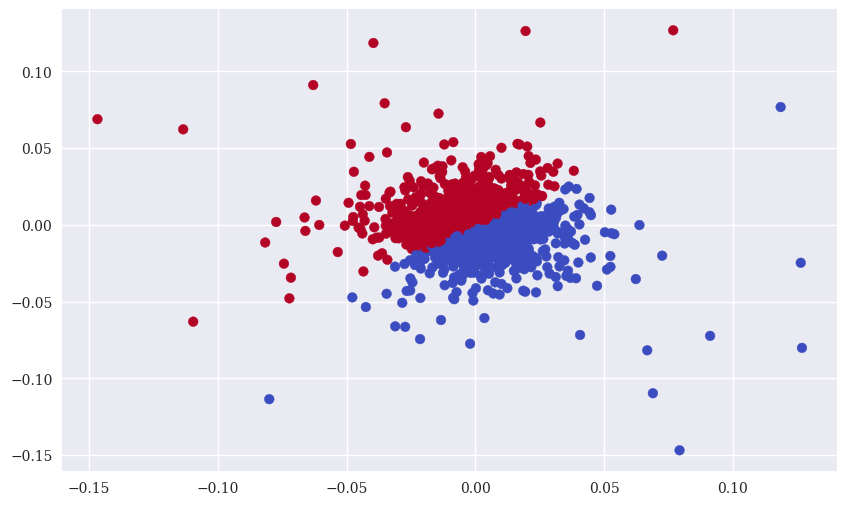

In [474]:
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
            c=data['pos_clus'], cmap='coolwarm');

In [475]:
data['strat_clus'] = data['pos_clus'] * data['returns']

data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       2.334748
strat_clus    1.853145
dtype: float64

In [476]:
(data['direction'] == data['pos_clus']).value_counts()

False    879
True     858
Name: count, dtype: int64

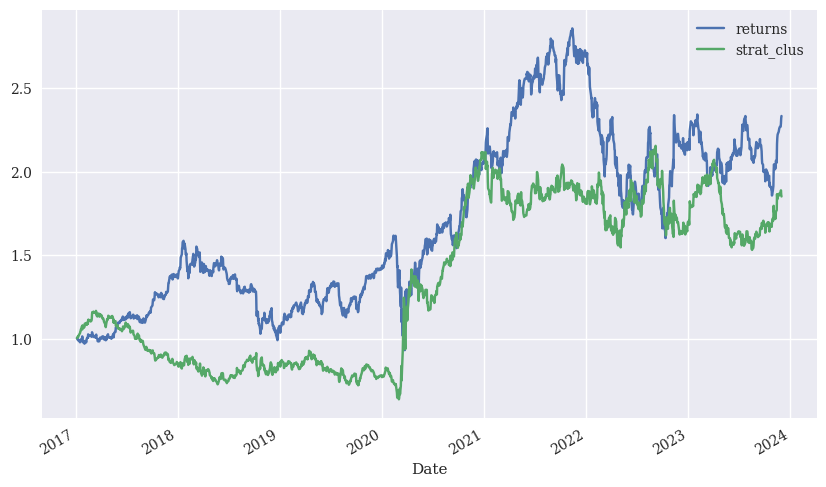

In [477]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [478]:
stkAssemble = stkAssemble.join(data['strat_clus'])

In [479]:
rtrn = np.exp(data['returns'].dropna().cumsum())

clus = np.exp(data['strat_clus'].cumsum())

y_actual = rtrn
y_predicted = clus

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, clus))
print('RMSE clus value is:', rmse)

mse = np.square(np.subtract(rtrn, clus)).mean()
print('MSE clus value is:', mse)

mbe = np.mean(rtrn - clus)
print('MBE clus value is:', mbe)

RMSE clus value is: 0.44593432410808626
MSE clus value is: 0.19885742141773574
MBE clus value is: 0.3572135478749433


#Considerations on Clustering

Clustering shown to be a not so efficient model to predict stocks behaviour. specially because the rate between false and true are almost 50/50.

## Frequency Approach

In [480]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)
create_bins(data)

data[cols_bin + ['direction']].head()

lag_1_bin  lag_2_bin  direction
Date                                                      
2017-01-06 00:00:00-05:00          0          1          1
2017-01-09 00:00:00-05:00          1          0         -1
2017-01-10 00:00:00-05:00          0          1         -1
2017-01-11 00:00:00-05:00          0          0          1
2017-01-12 00:00:00-05:00          1          0         -1

In [481]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           178
                       1           199
           1          -1           199
                       0             1
                       1           233
1          0          -1           200
                       1           233
           1          -1           232
                       0             1
                       1           261
dtype: int64

In [482]:
res = grouped['direction'].size().unstack(fill_value=0)

In [483]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [484]:
res.style.apply(highlight_max, axis=1)

In [485]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)

In [486]:
(data['direction'] == data['pos_freq']).value_counts()

True     897
False    840
Name: count, dtype: int64

In [487]:
data['strat_freq'] = data['pos_freq'] * data['returns']

data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       2.334748
strat_freq    2.447075
dtype: float64

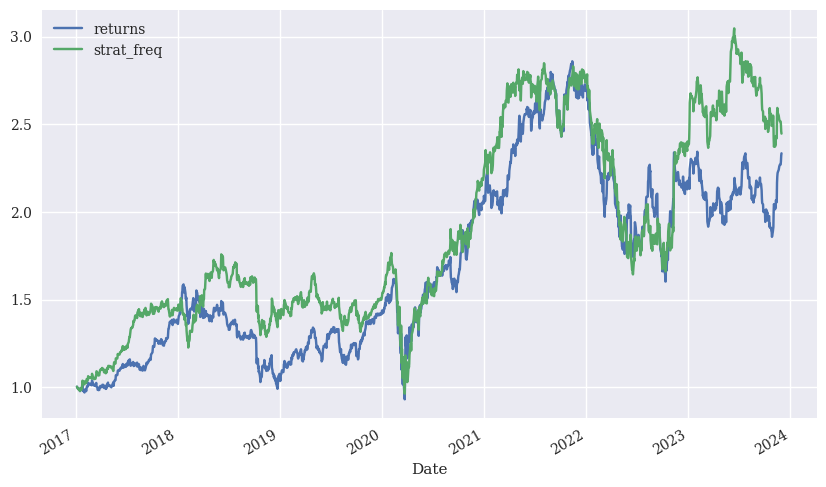

In [488]:
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [489]:
stkAssemble = stkAssemble.join(data['strat_freq'])

In [490]:
rtrn = np.exp(data['returns'].dropna().cumsum())

freq = np.exp(data['strat_freq'].cumsum())

y_actual = rtrn
y_predicted = freq

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, freq))
print('RMSE frequency value is:', rmse)

mse = np.square(np.subtract(rtrn, freq)).mean()
print('MSE frequency value is:', mse)

mbe = np.mean(rtrn - freq)
print('MBE frequency value is:', mbe)

RMSE frequency value is: 0.27682588449010154
MSE frequency value is: 0.07663257032372704
MBE frequency value is: -0.184963116258963


# Classification Algorithms

In [491]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C = 1
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
}

In [492]:
def fit_models(data):
    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
            for model in models.keys()}

fit_models(data)

def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])
derive_positions(data)

In [493]:
def evaluate_strats(data):
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')

In [494]:
evaluate_strats(data)

sel.insert(1, 'strat_freq')

data[sel].sum().apply(np.exp)

returns           2.334748
strat_freq        2.447075
strat_log_reg     2.334748
strat_gauss_nb    1.626679
strat_svm         2.334748
dtype: float64

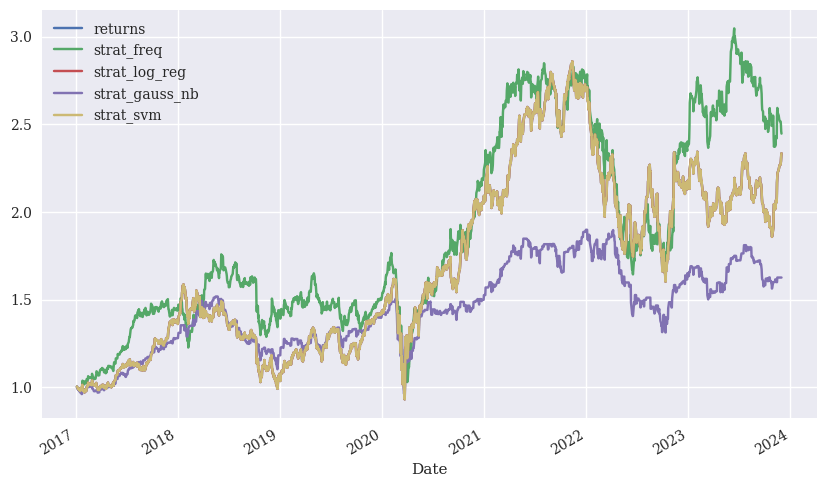

In [495]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [496]:
data = pd.DataFrame(data['Close'])

data['returns'] = np.log(data / data.shift(1))

data['direction'] = np.sign(data['returns'])

lags = 6
create_lags(data)
data.dropna(inplace=True)

In [497]:
create_bins(data)
cols_bin

['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin', 'lag_6_bin']

In [498]:
data[cols_bin].head()

lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  \
Date                                                                    
2017-01-18 00:00:00-05:00          0          1          0          1   
2017-01-19 00:00:00-05:00          1          0          1          0   
2017-01-20 00:00:00-05:00          0          1          0          1   
2017-01-23 00:00:00-05:00          1          0          1          0   
2017-01-24 00:00:00-05:00          0          1          0          1   

                           lag_5_bin  lag_6_bin  
Date                                             
2017-01-18 00:00:00-05:00          0          0  
2017-01-19 00:00:00-05:00          1          0  
2017-01-20 00:00:00-05:00          0          1  
2017-01-23 00:00:00-05:00          1          0  
2017-01-24 00:00:00-05:00          0          1

In [499]:
data.dropna(inplace=True)
fit_models(data)
derive_positions(data)
evaluate_strats(data)

data[sel].sum().apply(np.exp)

returns            2.382963
strat_log_reg      2.777264
strat_gauss_nb     2.171351
strat_svm         33.774306
dtype: float64

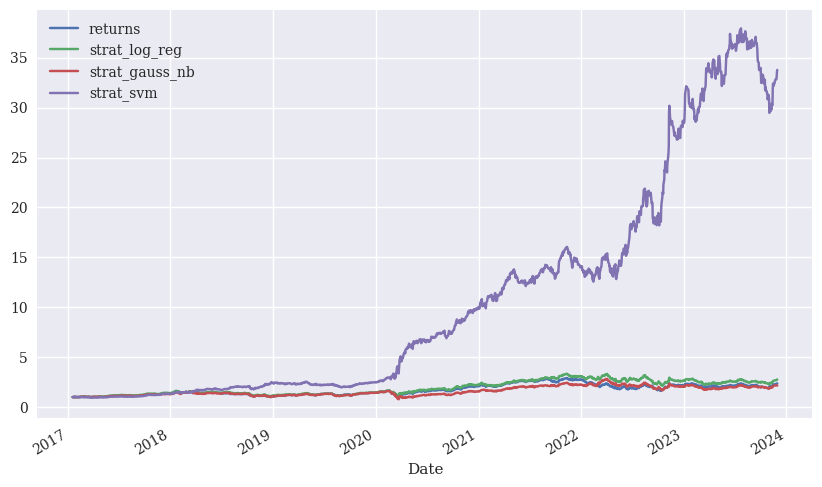

In [500]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [501]:
mu = data['returns'].mean()
v = data['returns'].std()

bins = [mu - v, mu, mu + v]
bins

[-0.017968588341103733, 0.0005019332170231102, 0.018972454775149954]

In [502]:
create_bins(data, bins)

data[cols_bin].head()

lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  \
Date                                                                    
2017-01-18 00:00:00-05:00          1          2          1          2   
2017-01-19 00:00:00-05:00          2          1          2          1   
2017-01-20 00:00:00-05:00          1          2          1          2   
2017-01-23 00:00:00-05:00          2          1          2          1   
2017-01-24 00:00:00-05:00          1          2          1          2   

                           lag_5_bin  lag_6_bin  
Date                                             
2017-01-18 00:00:00-05:00          1          1  
2017-01-19 00:00:00-05:00          2          1  
2017-01-20 00:00:00-05:00          1          2  
2017-01-23 00:00:00-05:00          2          1  
2017-01-24 00:00:00-05:00          1          2

In [503]:
fit_models(data)

derive_positions(data)

evaluate_strats(data)

data[sel].sum().apply(np.exp)*100

returns             238.296251
strat_log_reg       162.691400
strat_gauss_nb      211.210996
strat_svm         62501.074601
dtype: float64

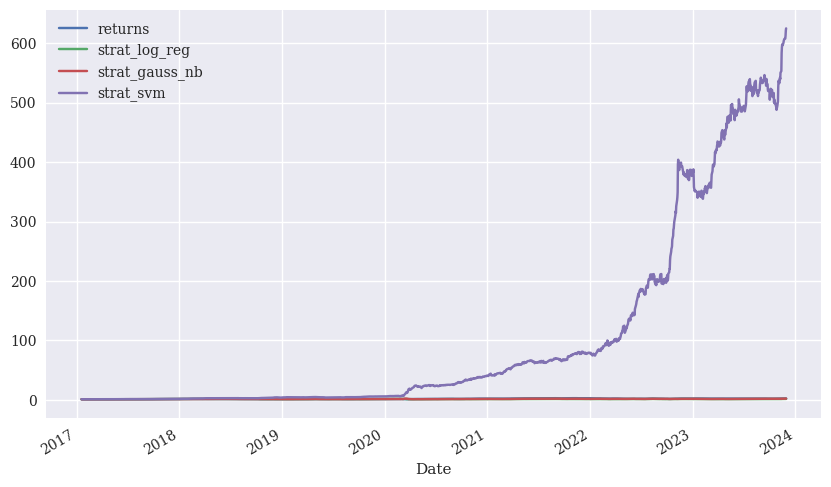

In [504]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

##Considerations on Classification Algorithms

Considering all 3 models: logistic regression, Naive Bayse and SVM (Support Vector Machine); SVM had an outstanding result compared to the other and compared to the natural stock return.

returns:            1.612788
strat_log_reg:      1.359044
strat_gauss_nb:     1.823926
strat_svm:         63.658212

##Sequential Train-Test Split

In [505]:
split = int(len(data) * 0.5)

train = data.iloc[:split].copy()

fit_models(train)

test = data.iloc[split:].copy()

derive_positions(test)

evaluate_strats(test)

test[sel].sum().apply(np.exp)*100

returns           151.169522
strat_log_reg     133.257118
strat_gauss_nb    136.344096
strat_svm         106.576553
dtype: float64

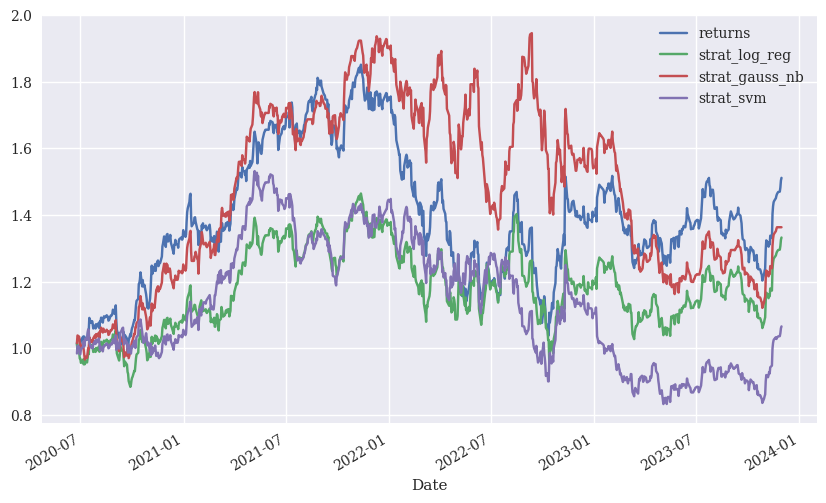

In [506]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

#Randomized Train-Test Split

In [507]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.5,
                               shuffle=True, random_state=100)
train = train.copy().sort_index()
train[cols_bin].head()

lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  \
Date                                                                    
2017-01-18 00:00:00-05:00          1          2          1          2   
2017-01-19 00:00:00-05:00          2          1          2          1   
2017-01-20 00:00:00-05:00          1          2          1          2   
2017-01-23 00:00:00-05:00          2          1          2          1   
2017-01-25 00:00:00-05:00          2          1          2          1   

                           lag_5_bin  lag_6_bin  
Date                                             
2017-01-18 00:00:00-05:00          1          1  
2017-01-19 00:00:00-05:00          2          1  
2017-01-20 00:00:00-05:00          1          2  
2017-01-23 00:00:00-05:00          2          1  
2017-01-25 00:00:00-05:00          2          1

In [508]:
test = test.copy().sort_index()
fit_models(train)
derive_positions(test)
evaluate_strats(test)

test[sel].sum().apply(np.exp)*100

returns           138.972454
strat_log_reg      83.443696
strat_gauss_nb     74.868927
strat_svm         170.908039
dtype: float64

In [509]:
stkAssemble.dropna()

Close  Strategy2SMA  Strategy3SMA  \
Date                                                                
2017-11-16 00:00:00-05:00  403.440948      0.007453     -0.007453   
2017-11-17 00:00:00-05:00  403.415405     -0.000063      0.000063   
2017-11-20 00:00:00-05:00  404.079346      0.001644     -0.001644   
2017-11-21 00:00:00-05:00  409.688141      0.013785     -0.013785   
2017-11-22 00:00:00-05:00  407.628448     -0.005040      0.005040   
...                               ...           ...           ...   
2023-11-24 00:00:00-05:00  725.260437     -0.004062      0.004062   
2023-11-27 00:00:00-05:00  725.836609     -0.000794      0.000794   
2023-11-28 00:00:00-05:00  731.876282     -0.008287      0.008287   
2023-11-29 00:00:00-05:00  742.346436     -0.014205      0.014205   
2023-11-30 00:00:00-05:00  746.250366     -0.005245      0.005245   

                           PredictionRW  strat_ols_1  strat_ols_2  strat_clus  \
Date                                                                            
2017-11-16 00:00:00-05:00    400.543084     0.007453     0.007453    0.007453   
2017-11-17 00:00:00-05:00    403.601152    -0.000063    -0.000063    0.000063   
2017-11-20 00:00:00-05:00    403.512262     0.001644     0.001644    0.001644   
2017-11-21 00:00:00-05:00    404.244432     0.013785     0.013785   -0.013785   
2017-11-22 00:00:00-05:00    409.674265     0.005040    -0.005040    0.005040   
...                                 ...          ...          ...         ...   
2023-11-24 00:00:00-05:00    722.558814     0.004062     0.004062    0.004062   
2023-11-27 00:00:00-05:00    725.473380     0.000794     0.000794    0.000794   
2023-11-28 00:00:00-05:00    726.067735     0.008287     0.008287    0.008287   
2023-11-29 00:00:00-05:00    732.011991     0.014205     0.014205   -0.014205   
2023-11-30 00:00:00-05:00    742.349037    -0.005245     0.005245   -0.005245   

                           strat_freq  
Date                                   
2017-11-16 00:00:00-05:00   -0.007453  
2017-11-17 00:00:00-05:00    0.000063  
2017-11-20 00:00:00-05:00    0.001644  
2017-11-21 00:00:00-05:00    0.013785  
2017-11-22 00:00:00-05:00    0.005040  
...                               ...  
2023-11-24 00:00:00-05:00   -0.004062  
2023-11-27 00:00:00-05:00   -0.000794  
2023-11-28 00:00:00-05:00   -0.008287  
2023-11-29 00:00:00-05:00   -0.014205  
2023-11-30 00:00:00-05:00   -0.005245  

[1519 rows x 8 columns]

<Axes: xlabel='Date'>

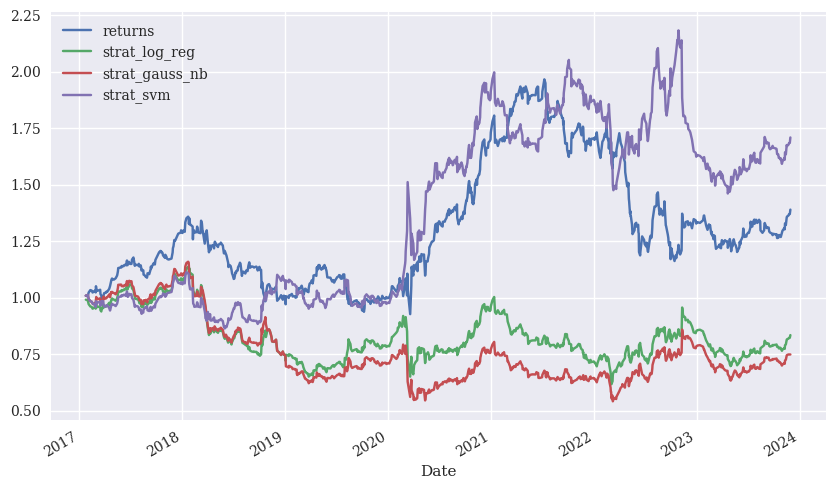

In [510]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [511]:
stkAssemble = stkAssemble.join(test['strat_log_reg'])
stkAssemble = stkAssemble.join(test['strat_gauss_nb'])
stkAssemble = stkAssemble.join(test['strat_svm'])
stkAssemble.dropna()

Close  Strategy2SMA  Strategy3SMA  \
Date                                                                
2017-11-20 00:00:00-05:00  404.079346      0.001644     -0.001644   
2017-11-24 00:00:00-05:00  408.309326      0.001669      0.001669   
2017-11-28 00:00:00-05:00  419.645966      0.022769      0.022769   
2017-11-29 00:00:00-05:00  426.250732      0.015616      0.015616   
2017-12-01 00:00:00-05:00  429.465240      0.006775      0.006775   
...                               ...           ...           ...   
2023-11-17 00:00:00-05:00  712.108154     -0.002738      0.002738   
2023-11-22 00:00:00-05:00  722.320068     -0.003444      0.003444   
2023-11-24 00:00:00-05:00  725.260437     -0.004062      0.004062   
2023-11-27 00:00:00-05:00  725.836609     -0.000794      0.000794   
2023-11-29 00:00:00-05:00  742.346436     -0.014205      0.014205   

                           PredictionRW  strat_ols_1  strat_ols_2  strat_clus  \
Date                                                                            
2017-11-20 00:00:00-05:00    403.512262     0.001644     0.001644    0.001644   
2017-11-24 00:00:00-05:00    407.801750     0.001669     0.001669    0.001669   
2017-11-28 00:00:00-05:00    410.198907     0.022769     0.022769   -0.022769   
2017-11-29 00:00:00-05:00    419.595526    -0.015616     0.015616   -0.015616   
2017-12-01 00:00:00-05:00    426.913192     0.006775     0.006775    0.006775   
...                                 ...          ...          ...         ...   
2023-11-17 00:00:00-05:00    711.153445     0.002738     0.002738    0.002738   
2023-11-22 00:00:00-05:00    719.986740     0.003444     0.003444    0.003444   
2023-11-24 00:00:00-05:00    722.558814     0.004062     0.004062    0.004062   
2023-11-27 00:00:00-05:00    725.473380     0.000794     0.000794    0.000794   
2023-11-29 00:00:00-05:00    732.011991     0.014205     0.014205   -0.014205   

                           strat_freq  strat_log_reg  strat_gauss_nb  \
Date                                                                   
2017-11-20 00:00:00-05:00    0.001644       0.001644        0.001644   
2017-11-24 00:00:00-05:00    0.001669       0.001669        0.001669   
2017-11-28 00:00:00-05:00   -0.022769       0.022769        0.022769   
2017-11-29 00:00:00-05:00   -0.015616       0.015616        0.015616   
2017-12-01 00:00:00-05:00   -0.006775       0.006775        0.006775   
...                               ...            ...             ...   
2023-11-17 00:00:00-05:00   -0.002738       0.002738        0.002738   
2023-11-22 00:00:00-05:00   -0.003444       0.003444        0.003444   
2023-11-24 00:00:00-05:00   -0.004062       0.004062        0.000000   
2023-11-27 00:00:00-05:00   -0.000794       0.000794        0.000000   
2023-11-29 00:00:00-05:00   -0.014205       0.014205        0.000000   

                           strat_svm  
Date                                  
2017-11-20 00:00:00-05:00   0.001644  
2017-11-24 00:00:00-05:00   0.001669  
2017-11-28 00:00:00-05:00   0.022769  
2017-11-29 00:00:00-05:00   0.015616  
2017-12-01 00:00:00-05:00   0.006775  
...                              ...  
2023-11-17 00:00:00-05:00  -0.002738  
2023-11-22 00:00:00-05:00   0.003444  
2023-11-24 00:00:00-05:00   0.004062  
2023-11-27 00:00:00-05:00   0.000794  
2023-11-29 00:00:00-05:00   0.014205  

[756 rows x 11 columns]

In [512]:
#Logistic Regression

rtrn = np.exp(test['returns'].dropna().cumsum())

lg = np.exp(test['strat_log_reg'].cumsum())

y_actual = rtrn
y_predicted = lg

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, lg))
print('RMSE Log Reg value is:', rmse)

mse = np.square(np.subtract(rtrn, lg)).mean()
print('MSE Log Reg value is:', mse)

mbe = np.mean(rtrn - lg)
print('MBE Log Reg value is:', mbe)

#Naive-Bayse

gb = np.exp(test['strat_gauss_nb'].cumsum())

y_actual = rtrn
y_predicted = gb

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, gb))
print('RMSE Gaussian Naive-Bayse value is:', rmse)

mse = np.square(np.subtract(rtrn, gb)).mean()
print('MSE Gaussian Naive-Bayse value is:', mse)

mbe = np.mean(rtrn - gb)
print('MBE Gaussian Naive-Bayse value is:', mbe)

#Support Vector Machine

svm = np.exp(test['strat_svm'].cumsum())

y_actual = rtrn
y_predicted = svm

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, svm))
print('RMSE Support Vector Machine value is:', rmse)

mse = np.square(np.subtract(rtrn, svm)).mean()
print('MSE Support Vector Machine value is:', mse)

mbe = np.mean(rtrn - svm)
print('MBE Support Vector Machine value is:', mbe)

RMSE Log Reg value is: 0.5551373667915201
MSE Log Reg value is: 0.3081774960082228
MBE Log Reg value is: 0.4764613387045454
RMSE Gaussian Naive-Bayse value is: 0.6394682810640936
MSE Gaussian Naive-Bayse value is: 0.40891968248706656
MBE Gaussian Naive-Bayse value is: 0.5444467521055488
RMSE Support Vector Machine value is: 0.26122458300752704
MSE Support Vector Machine value is: 0.06823828276745639
MBE Support Vector Machine value is: -0.0742810758523964


It seems that randomized train-test and randomized models don't seem like to be the most effective modelling alternative for predicting stocks based on results above

#Deep Neural Network

DNN with scikit-learn

In [150]:
#RUNNING 200 HIDDEN LAYERS

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [200], random_state=1)

%time model.fit(data[cols_bin], data['direction'])

CPU times: total: 8.94 s
Wall time: 4.69 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[200, 200], random_state=1,
              solver='lbfgs')

In [151]:
data['pos_dnn_sk'] = model.predict(data[cols_bin])

data['strat_dnn_sk'] = data['pos_dnn_sk'] * data['returns']

data[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns             2.382963
strat_dnn_sk    91489.978507
dtype: float64

<Axes: xlabel='Date'>

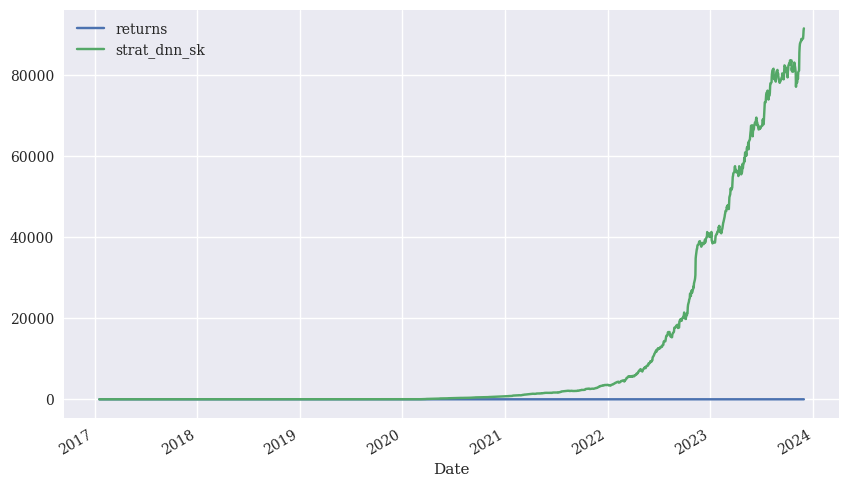

In [152]:
data[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6))

Randomized train-test split to get a more realistic result 200 hidden

In [153]:
train, test = train_test_split(data, test_size=0.5,
 random_state=1)
train = train.copy().sort_index()
test = test.copy().sort_index()
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=200,
 hidden_layer_sizes=3 * [200], random_state=1)
%time model.fit(train[cols_bin], train['direction'])
test['pos_dnn_sk200'] = model.predict(test[cols_bin])
test['test_dnn_sk200'] = test['pos_dnn_sk200'] * test['returns']

CPU times: total: 9.61 s
Wall time: 4.32 s


In [154]:
test[['returns', 'test_dnn_sk200']].sum().apply(np.exp)

returns           1.217771
test_dnn_sk200    2.400406
dtype: float64

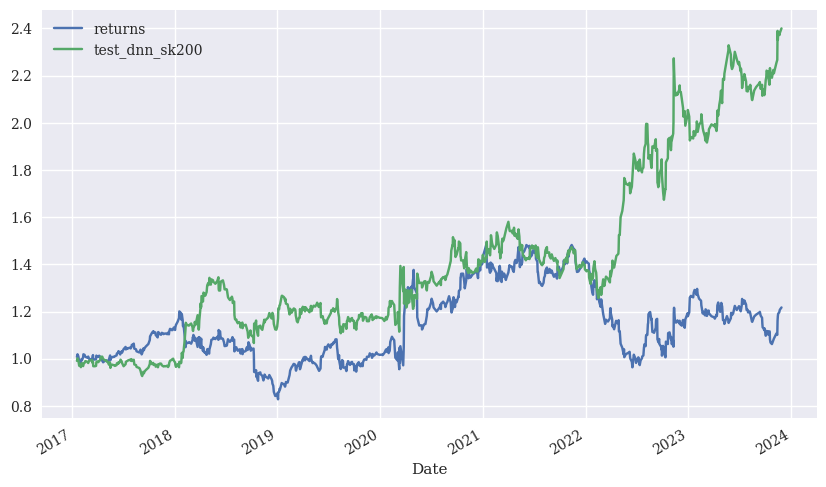

In [155]:
test[['returns', 'test_dnn_sk200']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6));

In [156]:
#RUNNING 250 HIDDEN LAYERS

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [250], random_state=1)

%time model.fit(data[cols_bin], data['direction'])

CPU times: total: 12.3 s
Wall time: 5.83 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[250, 250], random_state=1,
              solver='lbfgs')

In [157]:
data['pos_dnn_sk250'] = model.predict(data[cols_bin])

data['strat_dnn_sk250'] = data['pos_dnn_sk250'] * data['returns']

data[['returns', 'strat_dnn_sk250']].sum().apply(np.exp)

returns                 2.382963
strat_dnn_sk250    221112.616927
dtype: float64

<Axes: xlabel='Date'>

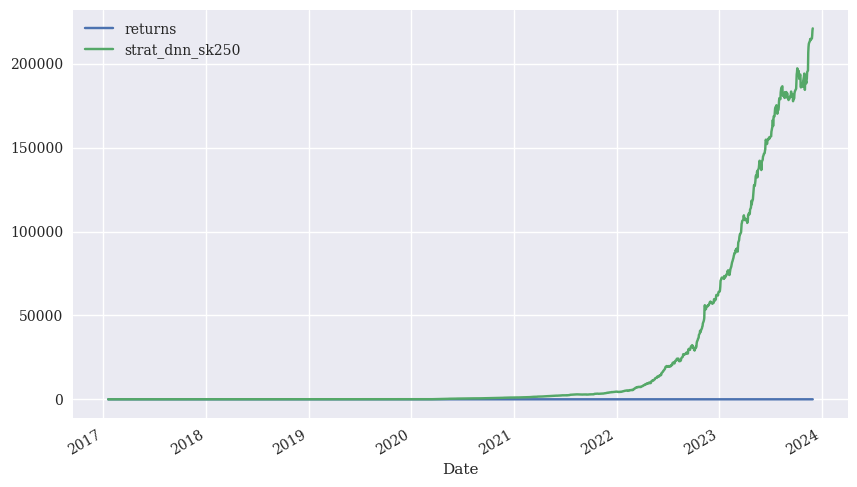

In [158]:
data[['returns', 'strat_dnn_sk250']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [159]:
test = test.loc[:, test.columns.intersection(['return','strat_dnn_sk', 'pos_dnn_sk250','pos_dnn_sk300', 'pos_dnn_sk500', 'pos_dnn_sk1000'])]

In [160]:
test

strat_dnn_sk
Date                                   
2017-01-18 00:00:00-05:00      0.008501
2017-01-20 00:00:00-05:00      0.010676
2017-01-23 00:00:00-05:00     -0.008796
2017-01-26 00:00:00-05:00      0.023212
2017-01-30 00:00:00-05:00     -0.000320
...                                 ...
2023-11-16 00:00:00-05:00      0.008513
2023-11-20 00:00:00-05:00      0.005648
2023-11-21 00:00:00-05:00      0.005147
2023-11-22 00:00:00-05:00     -0.003444
2023-11-28 00:00:00-05:00      0.008287

[865 rows x 1 columns]

Randomized train-test split to get a more realistic result 250 hidden

In [161]:
train, test = train_test_split(data, test_size=0.5,
 random_state=100)
train = train.copy().sort_index()
test = test.copy().sort_index()
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=250,
 hidden_layer_sizes=3 * [250], random_state=1)
%time model.fit(train[cols_bin], train['direction'])
test['pos_dnn_sk250'] = model.predict(test[cols_bin])
test['test_dnn_sk250'] = test['pos_dnn_sk250'] * test['returns']
testa = test

CPU times: total: 17.5 s
Wall time: 8.49 s


In [162]:
test[['returns', 'test_dnn_sk250']].sum().apply(np.exp)

returns           1.389725
test_dnn_sk250    1.604294
dtype: float64

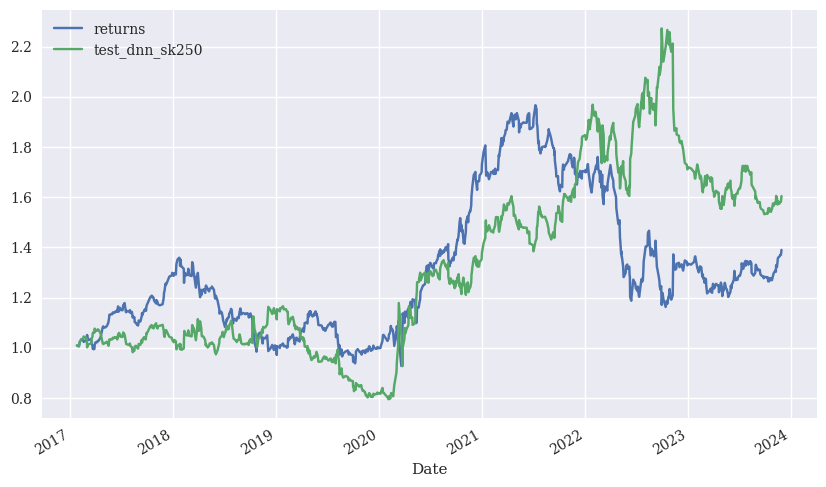

In [163]:
test[['returns', 'test_dnn_sk250']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6));

In [164]:
#RUNNING 300 HIDDEN LAYERS

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [300], random_state=1)

%time model.fit(data[cols_bin], data['direction'])

CPU times: total: 18.5 s
Wall time: 7.42 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[300, 300], random_state=1,
              solver='lbfgs')

In [165]:
data['pos_dnn_sk300'] = model.predict(data[cols_bin])

data['strat_dnn_sk300'] = data['pos_dnn_sk300'] * data['returns']

data[['returns', 'strat_dnn_sk300']].sum().apply(np.exp)

returns                 2.382963
strat_dnn_sk300    145037.183523
dtype: float64

<Axes: xlabel='Date'>

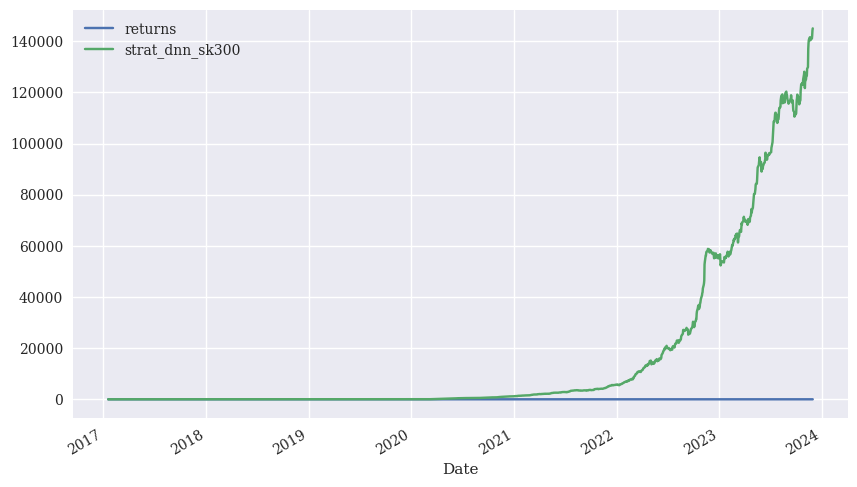

In [166]:
data[['returns', 'strat_dnn_sk300']].cumsum().apply(np.exp).plot(figsize=(10, 6))

Randomized train-test split to get a more realistic result 300 hidden

In [167]:
train, test = train_test_split(data, test_size=0.5,
 random_state=100)
train = train.copy().sort_index()
test = test.copy().sort_index()
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=300,
 hidden_layer_sizes=3 * [300], random_state=1)
%time model.fit(train[cols_bin], train['direction'])
test['pos_dnn_sk300'] = model.predict(test[cols_bin])
test['test_dnn_sk300'] = test['pos_dnn_sk300'] * test['returns']
testa = testa.join(test['test_dnn_sk300'])

CPU times: total: 33.3 s
Wall time: 12.9 s


In [168]:
testa

Close   returns  direction     lag_1  \
Date                                                                   
2017-01-24 00:00:00-05:00  318.658539  0.008743        1.0 -0.008796   
2017-01-31 00:00:00-05:00  312.475616 -0.003204       -1.0  0.000320   
2017-02-03 00:00:00-05:00  315.834381  0.016968        1.0 -0.003653   
2017-02-09 00:00:00-05:00  316.310760  0.010649        1.0 -0.006201   
2017-02-14 00:00:00-05:00  321.666534 -0.002205       -1.0  0.007649   
...                               ...       ...        ...       ...   
2023-11-17 00:00:00-05:00  712.108154  0.002738        1.0  0.008513   
2023-11-22 00:00:00-05:00  722.320068  0.003444        1.0  0.005147   
2023-11-24 00:00:00-05:00  725.260437  0.004062        1.0  0.003444   
2023-11-27 00:00:00-05:00  725.836609  0.000794        1.0  0.004062   
2023-11-29 00:00:00-05:00  742.346436  0.014205        1.0  0.008287   

                              lag_2     lag_3     lag_4     lag_5     lag_6  \
Date                                                                          
2017-01-24 00:00:00-05:00  0.010676 -0.001721  0.008501 -0.012067  0.002798   
2017-01-31 00:00:00-05:00 -0.011558 -0.023212  0.018059  0.008743 -0.008796   
2017-02-03 00:00:00-05:00 -0.002624 -0.003204  0.000320 -0.011558 -0.023212   
2017-02-09 00:00:00-05:00 -0.001405 -0.001535  0.016968 -0.003653 -0.002624   
2017-02-14 00:00:00-05:00  0.011347  0.010649 -0.006201 -0.001405 -0.001535   
...                             ...       ...       ...       ...       ...   
2023-11-17 00:00:00-05:00  0.016342  0.052853 -0.005353  0.020019 -0.004790   
2023-11-22 00:00:00-05:00  0.005648  0.002738  0.008513  0.016342  0.052853   
2023-11-24 00:00:00-05:00  0.005147  0.005648  0.002738  0.008513  0.016342   
2023-11-27 00:00:00-05:00  0.003444  0.005147  0.005648  0.002738  0.008513   
2023-11-29 00:00:00-05:00  0.000794  0.004062  0.003444  0.005147  0.005648   

                           lag_1_bin  ...  pos_svm  strat_log_reg  \
Date                                  ...                           
2017-01-24 00:00:00-05:00          1  ...      1.0       0.008743   
2017-01-31 00:00:00-05:00          1  ...     -1.0      -0.003204   
2017-02-03 00:00:00-05:00          1  ...      1.0      -0.016968   
2017-02-09 00:00:00-05:00          1  ...      1.0       0.010649   
2017-02-14 00:00:00-05:00          2  ...      1.0      -0.002205   
...                              ...  ...      ...            ...   
2023-11-17 00:00:00-05:00          2  ...     -1.0       0.002738   
2023-11-22 00:00:00-05:00          2  ...      1.0       0.003444   
2023-11-24 00:00:00-05:00          2  ...      1.0       0.004062   
2023-11-27 00:00:00-05:00          2  ...      1.0       0.000794   
2023-11-29 00:00:00-05:00          2  ...      1.0       0.014205   

                           strat_gauss_nb  strat_svm  pos_dnn_sk  \
Date                                                               
2017-01-24 00:00:00-05:00        0.008743   0.008743         1.0   
2017-01-31 00:00:00-05:00        0.003204   0.003204         1.0   
2017-02-03 00:00:00-05:00        0.016968   0.016968         1.0   
2017-02-09 00:00:00-05:00        0.010649   0.010649         1.0   
2017-02-14 00:00:00-05:00       -0.002205  -0.002205        -1.0   
...                                   ...        ...         ...   
2023-11-17 00:00:00-05:00        0.002738  -0.002738         1.0   
2023-11-22 00:00:00-05:00        0.003444   0.003444        -1.0   
2023-11-24 00:00:00-05:00        0.000000   0.004062         1.0   
2023-11-27 00:00:00-05:00        0.000000   0.000794         1.0   
2023-11-29 00:00:00-05:00        0.000000   0.014205         1.0   

                           strat_dnn_sk  pos_dnn_sk250  strat_dnn_sk250  \
Date                                                                      
2017-01-24 00:00:00-05:00      0.008743            1.0         0.008743   
2017-01-31 00:00:00-05:00     -0.003204            1.0     

In [169]:
test[['returns', 'test_dnn_sk300']].sum().apply(np.exp)

returns           1.389725
test_dnn_sk300    3.078891
dtype: float64

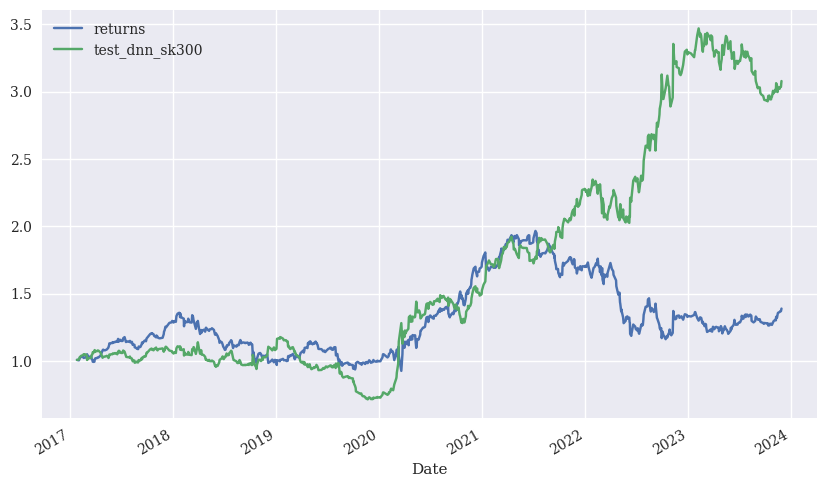

In [170]:
test[['returns', 'test_dnn_sk300']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6));

In [171]:
#RUNNING 500 HIDDEN LAYERS

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [500], random_state=1)

%time model.fit(data[cols_bin], data['direction'])

CPU times: total: 39.7 s
Wall time: 18 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[500, 500], random_state=1,
              solver='lbfgs')

In [172]:
data['pos_dnn_sk500'] = model.predict(data[cols_bin])

data['strat_dnn_sk500'] = data['pos_dnn_sk500'] * data['returns']

data[['returns', 'strat_dnn_sk500']].sum().apply(np.exp)

returns                 2.382963
strat_dnn_sk500    243635.187342
dtype: float64

<Axes: xlabel='Date'>

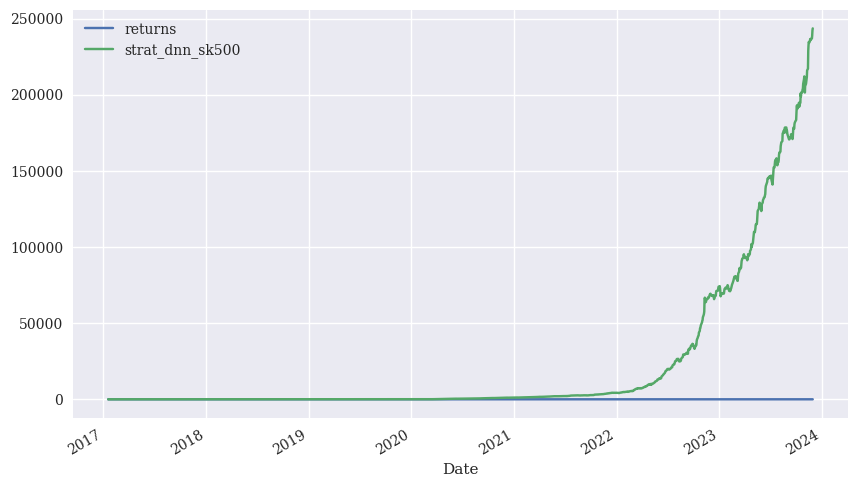

In [173]:
data[['returns', 'strat_dnn_sk500']].cumsum().apply(np.exp).plot(figsize=(10, 6))

Randomized train-test split to get a more realistic result 500 hidden

In [174]:
train, test = train_test_split(data, test_size=0.5,
 random_state=100)
train = train.copy().sort_index()
test = test.copy().sort_index()
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
 hidden_layer_sizes=3 * [500], random_state=1)
%time model.fit(train[cols_bin], train['direction'])
test['pos_dnn_sk500'] = model.predict(test[cols_bin])
test['test_dnn_sk500'] = test['pos_dnn_sk500'] * test['returns']
testa = testa.join(test['test_dnn_sk500'])

CPU times: total: 2min 7s
Wall time: 54.5 s


In [175]:
test[['returns', 'test_dnn_sk500']].sum().apply(np.exp)

returns           1.389725
test_dnn_sk500    2.802784
dtype: float64

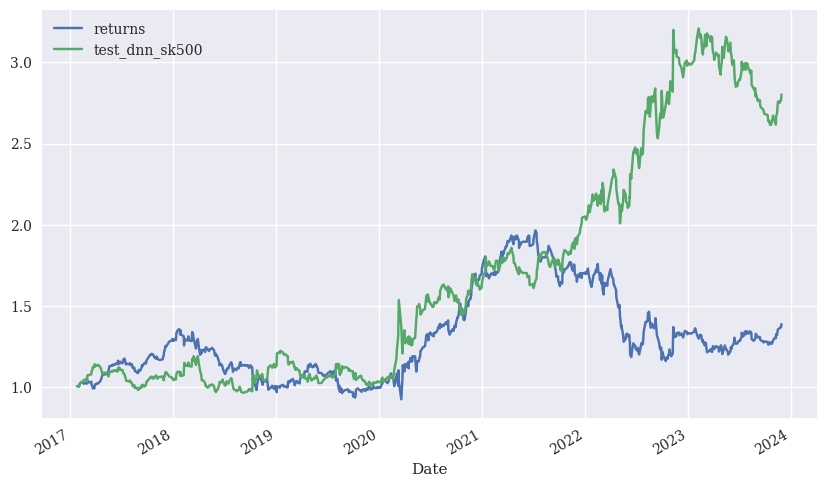

In [176]:
test[['returns', 'test_dnn_sk500']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6));

In [177]:
#RUNNING 1000 HIDDEN LAYERS

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [1000], random_state=1)

%time model.fit(data[cols_bin], data['direction'])

CPU times: total: 2min 15s
Wall time: 59.5 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[1000, 1000], random_state=1,
              solver='lbfgs')

In [178]:
data['pos_dnn_sk1000'] = model.predict(data[cols_bin])

data['strat_dnn_sk1000'] = data['pos_dnn_sk1000'] * data['returns']

data[['returns', 'strat_dnn_sk1000']].sum().apply(np.exp)

returns                  2.382963
strat_dnn_sk1000    435470.203798
dtype: float64

<Axes: xlabel='Date'>

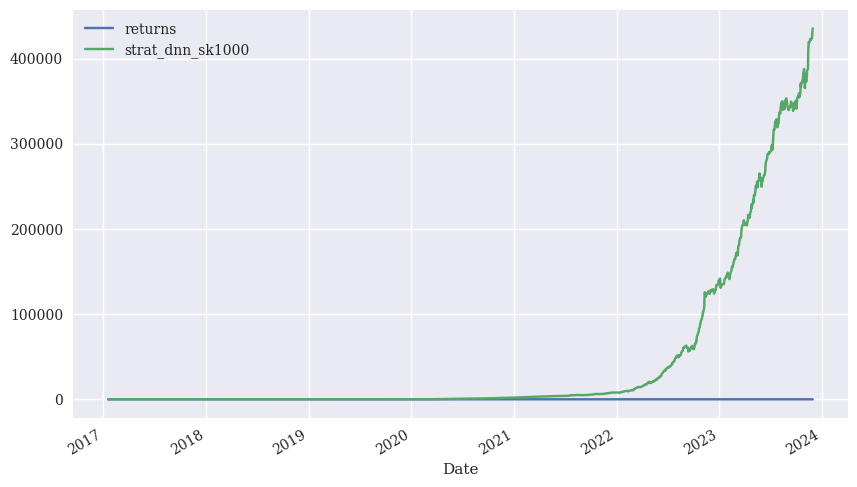

In [179]:
data[['returns', 'strat_dnn_sk1000']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [180]:
train, test = train_test_split(data, test_size=0.5,
 random_state=1)
train = train.copy().sort_index()
test = test.copy().sort_index()
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000,
 hidden_layer_sizes=3 * [1000], random_state=1)
%time model.fit(train[cols_bin], train['direction'])
test['pos_dnn_sk1000'] = model.predict(test[cols_bin])
test['test_dnn_sk1000'] = test['pos_dnn_sk1000'] * test['returns']
testa = testa.join(test['test_dnn_sk1000'])

CPU times: total: 17min 7s
Wall time: 6min 49s


In [181]:
test[['returns', 'test_dnn_sk1000']].sum().apply(np.exp)

returns            1.217771
test_dnn_sk1000    1.805089
dtype: float64

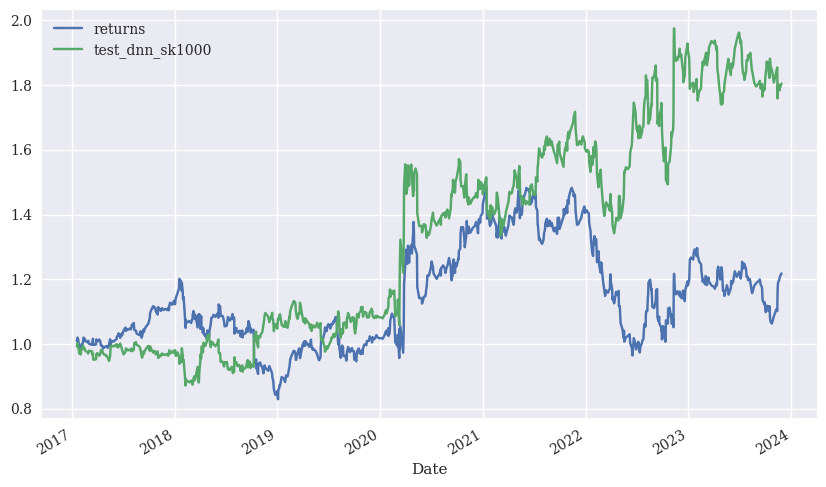

In [182]:
test[['returns', 'test_dnn_sk1000']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6));

In [183]:
stkAssemble = stkAssemble.join(data['strat_dnn_sk250'])
stkAssemble = stkAssemble.join(data['strat_dnn_sk300'])
stkAssemble = stkAssemble.join(data['strat_dnn_sk500'])
stkAssemble = stkAssemble.join(data['strat_dnn_sk1000'])
stkAssemble

Close  Strategy2SMA  Strategy3SMA  \
Date                                                                
2017-11-16 00:00:00-05:00  403.440948      0.007453     -0.007453   
2017-11-17 00:00:00-05:00  403.415405     -0.000063      0.000063   
2017-11-20 00:00:00-05:00  404.079346      0.001644     -0.001644   
2017-11-21 00:00:00-05:00  409.688141      0.013785     -0.013785   
2017-11-22 00:00:00-05:00  407.628448     -0.005040      0.005040   
...                               ...           ...           ...   
2023-11-24 00:00:00-05:00  725.260437     -0.004062      0.004062   
2023-11-27 00:00:00-05:00  725.836609     -0.000794      0.000794   
2023-11-28 00:00:00-05:00  731.876282     -0.008287      0.008287   
2023-11-29 00:00:00-05:00  742.346436     -0.014205      0.014205   
2023-11-30 00:00:00-05:00  746.250366     -0.005245      0.005245   

                           PredictionRW  strat_ols_1  strat_ols_2  strat_clus  \
Date                                                                            
2017-11-16 00:00:00-05:00    400.543084     0.007453     0.007453    0.007453   
2017-11-17 00:00:00-05:00    403.601152    -0.000063    -0.000063    0.000063   
2017-11-20 00:00:00-05:00    403.512262     0.001644     0.001644    0.001644   
2017-11-21 00:00:00-05:00    404.244432     0.013785     0.013785   -0.013785   
2017-11-22 00:00:00-05:00    409.674265     0.005040    -0.005040    0.005040   
...                                 ...          ...          ...         ...   
2023-11-24 00:00:00-05:00    722.558814     0.004062     0.004062    0.004062   
2023-11-27 00:00:00-05:00    725.473380     0.000794     0.000794    0.000794   
2023-11-28 00:00:00-05:00    726.067735     0.008287     0.008287    0.008287   
2023-11-29 00:00:00-05:00    732.011991     0.014205     0.014205   -0.014205   
2023-11-30 00:00:00-05:00    742.349037    -0.005245     0.005245   -0.005245   

                           strat_freq  strat_log_reg  strat_gauss_nb  \
Date                                                                   
2017-11-16 00:00:00-05:00   -0.007453       0.007453        0.007453   
2017-11-17 00:00:00-05:00    0.000063      -0.000063       -0.000063   
2017-11-20 00:00:00-05:00    0.001644       0.001644        0.001644   
2017-11-21 00:00:00-05:00    0.013785       0.013785        0.013785   
2017-11-22 00:00:00-05:00    0.005040      -0.005040       -0.005040   
...                               ...            ...             ...   
2023-11-24 00:00:00-05:00   -0.004062       0.004062        0.000000   
2023-11-27 00:00:00-05:00   -0.000794       0.000794        0.000000   
2023-11-28 00:00:00-05:00   -0.008287       0.008287        0.000000   
2023-11-29 00:00:00-05:00   -0.014205       0.014205        0.000000   
2023-11-30 00:00:00-05:00   -0.005245       0.005245        0.000000   

                           strat_svm  strat_dnn_sk250  strat_dnn_sk300  \
Date                                                                     
2017-11-16 00:00:00-05:00   0.007453         0.007453         0.007453   
2017-11-17 00:00:00-05:00  -0.000063        -0.000063        -0.000063   
2017-11-20 00:00:00-05:00   0.001644         0.001644         0.001644   
2017-11-21 00:00:00-05:00   0.013785        -0.013785        -0.013785   
2017-11-22 00:00:00-05:00  -0.005040         0.005040         0.005040   
...                              ...              ...              ...   
2023-11-24 00:00:00-05:00   0.004062         0.004062         0.004062   
2023-11-27 00:00:00-05:00   0.000794         0.000794         0.000794   
2023-11-28 00:00:00-05:00   0.008287         0.008287         0.008287   
2023-11-29 00:00:00-05:00   0.014205         0.014205         0.014205   
2023-11-30 00:00:00-05:00   0.005245         0.005245         0.005245   

                           strat_dnn_sk500  strat_dnn_sk1000  
Date                                                          
2017-11-16 00:00:00-05:00         0.007453          0.

In [184]:
testa.dropna()

Close   returns  direction     lag_1  \
Date                                                                   
2017-01-31 00:00:00-05:00  312.475616 -0.003204       -1.0  0.000320   
2017-02-03 00:00:00-05:00  315.834381  0.016968        1.0 -0.003653   
2017-02-09 00:00:00-05:00  316.310760  0.010649        1.0 -0.006201   
2017-02-14 00:00:00-05:00  321.666534 -0.002205       -1.0  0.007649   
2017-02-17 00:00:00-05:00  324.824951 -0.008223       -1.0 -0.002726   
...                               ...       ...        ...       ...   
2023-11-10 00:00:00-05:00  660.591980  0.020019        1.0 -0.004790   
2023-11-13 00:00:00-05:00  657.065491 -0.005353       -1.0  0.020019   
2023-11-15 00:00:00-05:00  704.141357  0.016342        1.0  0.052853   
2023-11-16 00:00:00-05:00  710.161194  0.008513        1.0  0.016342   
2023-11-22 00:00:00-05:00  722.320068  0.003444        1.0  0.005147   

                              lag_2     lag_3     lag_4     lag_5     lag_6  \
Date                                                                          
2017-01-31 00:00:00-05:00 -0.011558 -0.023212  0.018059  0.008743 -0.008796   
2017-02-03 00:00:00-05:00 -0.002624 -0.003204  0.000320 -0.011558 -0.023212   
2017-02-09 00:00:00-05:00 -0.001405 -0.001535  0.016968 -0.003653 -0.002624   
2017-02-14 00:00:00-05:00  0.011347  0.010649 -0.006201 -0.001405 -0.001535   
2017-02-17 00:00:00-05:00  0.020720 -0.002205  0.007649  0.011347  0.010649   
...                             ...       ...       ...       ...       ...   
2023-11-10 00:00:00-05:00  0.009758 -0.007113 -0.007245  0.020700  0.044871   
2023-11-13 00:00:00-05:00 -0.004790  0.009758 -0.007113 -0.007245  0.020700   
2023-11-15 00:00:00-05:00 -0.005353  0.020019 -0.004790  0.009758 -0.007113   
2023-11-16 00:00:00-05:00  0.052853 -0.005353  0.020019 -0.004790  0.009758   
2023-11-22 00:00:00-05:00  0.005648  0.002738  0.008513  0.016342  0.052853   

                           lag_1_bin  ...  strat_gauss_nb  strat_svm  \
Date                                  ...                              
2017-01-31 00:00:00-05:00          1  ...        0.003204   0.003204   
2017-02-03 00:00:00-05:00          1  ...        0.016968   0.016968   
2017-02-09 00:00:00-05:00          1  ...        0.010649   0.010649   
2017-02-14 00:00:00-05:00          2  ...       -0.002205  -0.002205   
2017-02-17 00:00:00-05:00          1  ...       -0.008223  -0.008223   
...                              ...  ...             ...        ...   
2023-11-10 00:00:00-05:00          1  ...        0.020019   0.020019   
2023-11-13 00:00:00-05:00          3  ...       -0.005353   0.005353   
2023-11-15 00:00:00-05:00          3  ...        0.016342   0.016342   
2023-11-16 00:00:00-05:00          2  ...        0.008513   0.008513   
2023-11-22 00:00:00-05:00          2  ...        0.003444   0.003444   

                           pos_dnn_sk  strat_dnn_sk  pos_dnn_sk250  \
Date                                                                 
2017-01-31 00:00:00-05:00         1.0     -0.003204            1.0   
2017-02-03 00:00:00-05:00         1.0      0.016968            1.0   
2017-02-09 00:00:00-05:00         1.0      0.010649            1.0   
2017-02-14 00:00:00-05:00        -1.0      0.002205           -1.0   
2017-02-17 00:00:00-05:00         1.0     -0.008223           -1.0   
...                               ...           ...            ...   
2023-11-10 00:00:00-05:00         1.0      0.020019            1.0   
2023-11-13 00:00:00-05:00        -1.0      0.005353            1.0   
2023-11-15 00:00:00-05:00         1.0      0.016342           -1.0   
2023-11-16 00:00:00-05:00         1.0      0.008513            1.0   
2023-11-22 00:00:00-05:00        -1.0     -0.003444           -1.0   

                           strat_dnn_sk250  test_dnn_sk250  test_dnn_sk300  \
Date                                                                         
2017-01-31 00:00:00-05:00         0.003204       -0.003204     

In [185]:
rtrn = np.exp(test['returns'].dropna().cumsum())

###DNN 300

dnn300 = np.exp(testa['test_dnn_sk300'].dropna().cumsum())

y_actual = rtrn
y_predicted = dnn300

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, dnn300))
print('RMSE DNN_sk300 value is:', rmse)

mse = np.square(np.subtract(rtrn, dnn300)).mean()
print('MSE DNN_sk300 value is:', mse)

mbe = np.mean(rtrn - dnn300)
print('MBE DNN_sk300 value is:', mbe)

###DNN 500

dnn500 = np.exp(testa['test_dnn_sk500'].dropna().cumsum())

y_actual = rtrn
y_predicted = dnn500

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, dnn500))
print('RMSE DNN_sk500 value is:', rmse)

mse = np.square(np.subtract(rtrn, dnn500)).mean()
print('MSE DNN_sk500 value is:', mse)

mbe = np.mean(rtrn - dnn500)
print('MBE DNN_sk500 value is:', mbe)

###DNN 1000

dnn1000 = np.exp(test['test_dnn_sk1000'].cumsum().dropna())

y_actual = rtrn
y_predicted = dnn1000

df=DataFrame({'Actual': y_actual, 'Prediction': y_predicted})
df.dropna()
#RMSE and MSE

rmse = sqrt(mean_squared_error(rtrn, dnn1000))
print('RMSE DNN_sk1000 value is:', rmse)

mse = np.square(np.subtract(rtrn, dnn1000)).mean()
print('MSE DNN_sk1000 value is:', mse)

mbe = np.mean(rtrn - dnn1000)
print('MBE DNN_sk1000 value is:', mbe)
 

RMSE DNN_sk300 value is: 0.9389691504648487
MSE DNN_sk300 value is: 0.8952568029881256
MBE DNN_sk300 value is: -0.5407908142279839
RMSE DNN_sk500 value is: 0.8437187301852908
MSE DNN_sk500 value is: 0.7297776873668447
MBE DNN_sk500 value is: -0.5358831170937072
RMSE DNN_sk1000 value is: 0.3338205040858869
MSE DNN_sk1000 value is: 0.11143612894815566
MBE DNN_sk1000 value is: -0.18942418899152683


In [186]:
stkAssemble.drop(["Close", "PredictionRW"], axis=1)

Strategy2SMA  Strategy3SMA  strat_ols_1  \
Date                                                                 
2017-11-16 00:00:00-05:00      0.007453     -0.007453     0.007453   
2017-11-17 00:00:00-05:00     -0.000063      0.000063    -0.000063   
2017-11-20 00:00:00-05:00      0.001644     -0.001644     0.001644   
2017-11-21 00:00:00-05:00      0.013785     -0.013785     0.013785   
2017-11-22 00:00:00-05:00     -0.005040      0.005040     0.005040   
...                                 ...           ...          ...   
2023-11-24 00:00:00-05:00     -0.004062      0.004062     0.004062   
2023-11-27 00:00:00-05:00     -0.000794      0.000794     0.000794   
2023-11-28 00:00:00-05:00     -0.008287      0.008287     0.008287   
2023-11-29 00:00:00-05:00     -0.014205      0.014205     0.014205   
2023-11-30 00:00:00-05:00     -0.005245      0.005245    -0.005245   

                           strat_ols_2  strat_clus  strat_freq  strat_log_reg  \
Date                                                                            
2017-11-16 00:00:00-05:00     0.007453    0.007453   -0.007453       0.007453   
2017-11-17 00:00:00-05:00    -0.000063    0.000063    0.000063      -0.000063   
2017-11-20 00:00:00-05:00     0.001644    0.001644    0.001644       0.001644   
2017-11-21 00:00:00-05:00     0.013785   -0.013785    0.013785       0.013785   
2017-11-22 00:00:00-05:00    -0.005040    0.005040    0.005040      -0.005040   
...                                ...         ...         ...            ...   
2023-11-24 00:00:00-05:00     0.004062    0.004062   -0.004062       0.004062   
2023-11-27 00:00:00-05:00     0.000794    0.000794   -0.000794       0.000794   
2023-11-28 00:00:00-05:00     0.008287    0.008287   -0.008287       0.008287   
2023-11-29 00:00:00-05:00     0.014205   -0.014205   -0.014205       0.014205   
2023-11-30 00:00:00-05:00     0.005245   -0.005245   -0.005245       0.005245   

                           strat_gauss_nb  strat_svm  strat_dnn_sk250  \
Date                                                                    
2017-11-16 00:00:00-05:00        0.007453   0.007453         0.007453   
2017-11-17 00:00:00-05:00       -0.000063  -0.000063        -0.000063   
2017-11-20 00:00:00-05:00        0.001644   0.001644         0.001644   
2017-11-21 00:00:00-05:00        0.013785   0.013785        -0.013785   
2017-11-22 00:00:00-05:00       -0.005040  -0.005040         0.005040   
...                                   ...        ...              ...   
2023-11-24 00:00:00-05:00        0.000000   0.004062         0.004062   
2023-11-27 00:00:00-05:00        0.000000   0.000794         0.000794   
2023-11-28 00:00:00-05:00        0.000000   0.008287         0.008287   
2023-11-29 00:00:00-05:00        0.000000   0.014205         0.014205   
2023-11-30 00:00:00-05:00        0.000000   0.005245         0.005245   

                           strat_dnn_sk300  strat_dnn_sk500  strat_dnn_sk1000  
Date                                                                           
2017-11-16 00:00:00-05:00         0.007453         0.007453          0.007453  
2017-11-17 00:00:00-05:00        -0.000063        -0.000063         -0.000063  
2017-11-20 00:00:00-05:00         0.001644         0.001644          0.001644  
2017-11-21 00:00:00-05:00        -0.013785        -0.013785         -0.013785  
2017-11-22 00:00:00-05:00         0.005040         0.005040          0.005040  
...                                    ...              ...               ...  
2023-11-24 00:00:00-05:00         0.004062         0.004062          0.004062  
2023-11-27 00:00:00-05:00         0.000794         0.000794          0.000794  
2023-11-28 00:00:00-05:00         0.008287         0.008287          0.008287  
2023-11-29 00:00:00-05:00         0.014205         0.014205          0.014205  
2023-11-30 00:00:00-05:00         0.005245         0.005245          0.005245  

[1519 rows x 13 columns]

In [187]:
stkAssemble.cumsum()

Close  Strategy2SMA  Strategy3SMA  \
Date                                                                   
2017-11-16 00:00:00-05:00     403.440948      0.007453     -0.007453   
2017-11-17 00:00:00-05:00     806.856354      0.007390     -0.007390   
2017-11-20 00:00:00-05:00    1210.935699      0.009035     -0.009035   
2017-11-21 00:00:00-05:00    1620.623840      0.022819     -0.022819   
2017-11-22 00:00:00-05:00    2028.252289      0.017779     -0.017779   
...                                  ...           ...           ...   
2023-11-24 00:00:00-05:00  866450.161591     -0.159113      1.169200   
2023-11-27 00:00:00-05:00  867175.998199     -0.159907      1.169994   
2023-11-28 00:00:00-05:00  867907.874481     -0.168194      1.178280   
2023-11-29 00:00:00-05:00  868650.220917     -0.182398      1.192485   
2023-11-30 00:00:00-05:00  869396.471283     -0.187643      1.197730   

                            PredictionRW  strat_ols_1  strat_ols_2  \
Date                                                                 
2017-11-16 00:00:00-05:00     400.543084     0.007453     0.007453   
2017-11-17 00:00:00-05:00     804.144236     0.007390     0.007390   
2017-11-20 00:00:00-05:00    1207.656498     0.009035     0.009035   
2017-11-21 00:00:00-05:00    1611.900930     0.022819     0.022819   
2017-11-22 00:00:00-05:00    2021.575195     0.027860     0.017779   
...                                  ...          ...          ...   
2023-11-24 00:00:00-05:00  866348.069544     0.614745     0.317514   
2023-11-27 00:00:00-05:00  867073.542925     0.615539     0.318309   
2023-11-28 00:00:00-05:00  867799.610660     0.623826     0.326595   
2023-11-29 00:00:00-05:00  868531.622651     0.638030     0.340800   
2023-11-30 00:00:00-05:00  869273.971688     0.632785     0.346045   

                           strat_clus  strat_freq  strat_log_reg  \
Date                                                               
2017-11-16 00:00:00-05:00    0.007453   -0.007453       0.007453   
2017-11-17 00:00:00-05:00    0.007517   -0.007390       0.007390   
2017-11-20 00:00:00-05:00    0.009161   -0.005746       0.009035   
2017-11-21 00:00:00-05:00   -0.004624    0.008039       0.022819   
2017-11-22 00:00:00-05:00    0.000416    0.013080       0.017779   
...                               ...         ...            ...   
2023-11-24 00:00:00-05:00    0.720888    0.534758       0.296275   
2023-11-27 00:00:00-05:00    0.721682    0.533964       0.297069   
2023-11-28 00:00:00-05:00    0.729969    0.525677       0.305355   
2023-11-29 00:00:00-05:00    0.715764    0.511473       0.319560   
2023-11-30 00:00:00-05:00    0.710519    0.506228       0.324805   

                           strat_gauss_nb  strat_svm  strat_dnn_sk250  \
Date                                                                    
2017-11-16 00:00:00-05:00        0.007453   0.007453         0.007453   
2017-11-17 00:00:00-05:00        0.007390   0.007390         0.007390   
2017-11-20 00:00:00-05:00        0.009035   0.009035         0.009035   
2017-11-21 00:00:00-05:00        0.022819   0.022819        -0.004750   
2017-11-22 00:00:00-05:00        0.017779   0.017779         0.000290   
...                                   ...        ...              ...   
2023-11-24 00:00:00-05:00        0.533865   6.068742        11.852512   
2023-11-27 00:00:00-05:00        0.533865   6.069536        11.853306   
2023-11-28 00:00:00-05:00        0.533865   6.077823        11.861593   
2023-11-29 00:00:00-05:00        0.533865   6.092028        11.875797   
2023-11-30 00:00:00-05:00        0.533865   6.097273        11.881042   

                           strat_dnn_sk300  strat_dnn_sk500  strat_dnn_sk1000  
Date                                                                           
2017-11-16 00:00:00-05:00         0.007453         0.007453          0.007453  
2017-11-17 00:00:00-05:00         0.007390         0.007390          0.007390  
2017-11-20 00:00:00-05:00       

In [188]:
table = pd.DataFrame({'Model': stkAssemble.sum().index, 'Results': stkAssemble.sum().apply(np.exp)})

excel_filename = 'result_table.xlsx'
table.to_excel(excel_filename, index=False)

print(f"Result exported to {excel_filename}")

print(table)

Result exported to result_table.xlsx
                             Model       Results
Close                        Close           inf
Strategy2SMA          Strategy2SMA  8.289103e-01
Strategy3SMA          Strategy3SMA  3.312589e+00
PredictionRW          PredictionRW           inf
strat_ols_1            strat_ols_1  1.882847e+00
strat_ols_2            strat_ols_2  1.413466e+00
strat_clus              strat_clus  2.035048e+00
strat_freq              strat_freq  1.659021e+00
strat_log_reg        strat_log_reg  1.383761e+00
strat_gauss_nb      strat_gauss_nb  1.705512e+00
strat_svm                strat_svm  4.446434e+02
strat_dnn_sk250    strat_dnn_sk250  1.445011e+05
strat_dnn_sk300    strat_dnn_sk300  1.051489e+05
strat_dnn_sk500    strat_dnn_sk500  1.590071e+05
strat_dnn_sk1000  strat_dnn_sk1000  2.774362e+05


In [198]:
import pandas as pd

cor = {
    'SMA': [0.5662, 0.3206, -0.195],
    'OLS1 Reg': [0.5434, 0.2953, -0.2805],
    'OLS2 Reg': [0.4481, 0.2008, 0.3374],
    'Clustering': [0.4459, 0.1988, 0.3572],
    'Frequency': [0.2768, 0.0766, -0.1849],
    'LR': [0.6219, 0.3868, 0.4011],
    'NB': [0.4145, 0.1718, 0.26],
    'SVM': [192.26, 36967.25, -101.95],
    'DNN 300': [0.9389, 0.8952, -0.5407],
    'DNN 500': [0.8437, 0.7297, -0.5358],
    'DNN 1000': [0.3338, 0.1114, -0.1894]
}

df = pd.DataFrame(cor)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                 SMA  OLS1 Reg  OLS2 Reg  Clustering  Frequency        LR  \
SMA         1.000000  0.999718  0.258250    0.159483   0.992136  0.711006   
OLS1 Reg    0.999718  1.000000  0.235256    0.136015   0.988888  0.694122   
OLS2 Reg    0.258250  0.235256  1.000000    0.994899   0.377135  0.862950   
Clustering  0.159483  0.136015  0.994899    1.000000   0.281787  0.807579   
Frequency   0.992136  0.988888  0.377135    0.281787   1.000000  0.793426   
LR          0.711006  0.694122  0.862950    0.807579   0.793426  1.000000   
NB          0.460034  0.438838  0.976586    0.949904   0.567547  0.951447   
SVM         0.207380  0.230532 -0.891520   -0.932666   0.083309 -0.540451   
DNN 300     0.956614  0.963257 -0.034431   -0.135067   0.912624  0.475277   
DNN 500     0.969628  0.975158  0.014120   -0.086814   0.931391  0.517423   
DNN 1000    0.993315  0.990296  0.368046    0.272377   0.999952  0.787427   

                  NB       SVM   DNN 300   DNN 500  DNN 1000  
SMA         

In [194]:
pip install seaborn

SyntaxError: invalid syntax (3227301697.py, line 1)

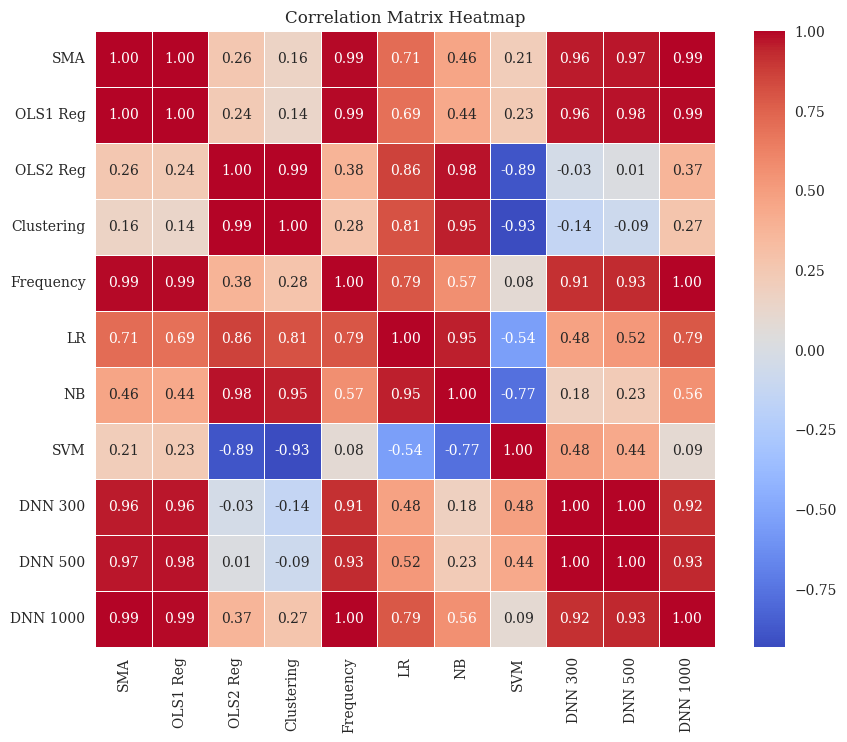

In [199]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

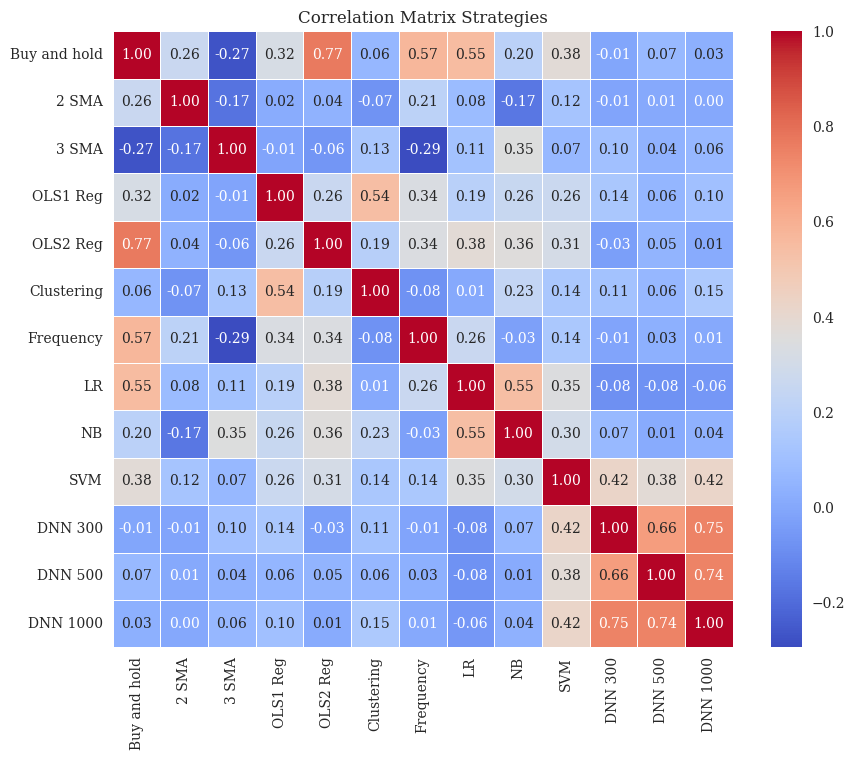

In [208]:

import seaborn as sns

cor = {
    "Buy and hold": data['returns'], 
    '2 SMA': stkAssemble['Strategy2SMA'],
    '3 SMA': stkAssemble['Strategy3SMA'],
    'OLS1 Reg': stkAssemble['strat_ols_1'],
    'OLS2 Reg': stkAssemble['strat_ols_2'],
    'Clustering': stkAssemble['strat_clus'],
    'Frequency': stkAssemble['strat_freq'],
    'LR': stkAssemble['strat_log_reg'],
    'NB': stkAssemble['strat_gauss_nb'],
    'SVM': stkAssemble['strat_svm'],
    'DNN 300': stkAssemble['strat_dnn_sk300'],
    'DNN 500': stkAssemble['strat_dnn_sk500'],
    'DNN 1000': stkAssemble['strat_dnn_sk1000']
}

df = pd.DataFrame(cor)

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Strategies')
plt.show()


In [205]:
stkAssemble.describe()

Close  Strategy2SMA  Strategy3SMA  PredictionRW  strat_ols_1  \
count  1519.000000   1519.000000   1519.000000   1519.000000  1519.000000   
mean    572.347907     -0.000124      0.000788    572.267262     0.000417   
std     154.569918      0.019435      0.019419    154.609033     0.019431   
min     298.123016     -0.146815     -0.126843    299.188732    -0.118552   
25%     434.874664     -0.008878     -0.008482    435.048213    -0.009052   
50%     569.478943      0.000449      0.000964    567.342243     0.000488   
75%     684.302979      0.009907      0.010149    684.415513     0.009544   
max     913.899414      0.126843      0.146815    913.856956     0.146815   

       strat_ols_2   strat_clus   strat_freq  strat_log_reg  strat_gauss_nb  \
count  1519.000000  1519.000000  1519.000000    1519.000000     1519.000000   
mean      0.000228     0.000468     0.000333       0.000214        0.000351   
std       0.019434     0.019430     0.019433       0.019434        0.019244   
min      -0.126843    -0.126843    -0.146815      -0.146815       -0.126843   
25%      -0.008725    -0.009052    -0.008882      -0.008833       -0.008288   
50%       0.000961     0.000040     0.000345       0.001022        0.000439   
75%       0.009953     0.009596     0.009684       0.009840        0.009657   
max       0.146815     0.146815     0.126843       0.126843        0.146815   

         strat_svm  strat_dnn_sk250  strat_dnn_sk300  strat_dnn_sk500  \
count  1519.000000      1519.000000      1519.000000      1519.000000   
mean      0.004014         0.007822         0.007612         0.007885   
std       0.019016         0.017791         0.017882         0.017763   
min      -0.113514        -0.053469        -0.077402        -0.066367   
25%      -0.005526         0.000354         0.000156         0.000455   
50%       0.003624         0.006048         0.006004         0.006201   
75%       0.012445         0.014912         0.014926         0.014976   
max       0.146815         0.146815         0.146815         0.146815   

       strat_dnn_sk1000  
count       1519.000000  
mean           0.008251  
std            0.017596  
min           -0.077402  
25%            0.000713  
50%            0.006551  
75%            0.015103  
max            0.146815